In [2]:
import numpy as np
import pandas as pd
import pyodbc

In [5]:


# Configuración de la conexión a la base de datos SQL Server
server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'  # Asegúrate de tener el controlador correcto instalado


# Establecer la cadena de conexión a la base de datos
conn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establecer la conexión con la base de datos
conn = pyodbc.connect(conn_str)

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Nombre de la tabla en la base de datos donde se importará el archivo de Excel
table_name = 'Train'

# Eliminar la tabla si ya existe (opcional)
query = f"SELECT * FROM  {table_name}"

df = pd.read_sql(query, conn)
conn.close()

#print("¡Archivo de Excel importado correctamente en la base de datos!")


C:\Users\jcalabozo\AppData\Local\Temp\ipykernel_6956\3372889995.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304337 entries, 0 to 304336
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   NumeroDeAfiliado                 304337 non-null  int64 
 1   Secuencia                        304337 non-null  object
 2   CodigoDeSucursal                 304337 non-null  object
 3   ApellidoAfiliado                 304337 non-null  object
 4   AnioIndicador                    304337 non-null  int64 
 5   MesIndicador                     304337 non-null  object
 6   TipoAfiliacion                   304337 non-null  object
 7   DescripcionDeSexo                303647 non-null  object
 8   EstadoMesIndicadores             304337 non-null  object
 9   Convenio                         304337 non-null  object
 10  DescripcionDeTipoDePago          304314 non-null  object
 11  DescripcionDeInstitucionDeCobro  294823 non-null  object
 12  UsoServicioAlgun

In [7]:
#Completa valores nulos

df['DescripcionDeTipoDePago']=df['DescripcionDeTipoDePago'].fillna('N/A')
df['DescripcionDeInstitucionDeCobro']=df['DescripcionDeInstitucionDeCobro'].fillna('N/A')
df['DescripcionDeSexo']=df['DescripcionDeSexo'].fillna('Indefinido')


In [8]:
# retrieve all labels and store in a list
columnas = df.columns.tolist()

# iterate over the list to print all unique values of each column in the dataframe
for i in columnas:
    print(i,':',df[i].unique())

NumeroDeAfiliado : [680824 680836 680842 ... 549787 658802 658679]
Secuencia : ['1' '0' '3' '2' '5' '4' '6' '7' '38' '9' '8' '10' '11' '14' '15' '17'
 '12' '25' '16' '13' '20' '35' '32' '24' '18' '30' '23' '33' '19' '22'
 '34' '21' '28' '29' '31' '40' '41' '42' '36' '26' '44' '39' '27' '43'
 '37' '46' '45']
CodigoDeSucursal : ['2' '1']
ApellidoAfiliado : ['LENCINAS                      ' 'PRATO                         '
 'VAZQUEZ                       ' ... 'PARROTTI                      '
 'BUASSO                        ' 'VEGA CASAJENAS                ']
AnioIndicador : [2021 2009 2011 2017 2018 2010 2019 2008 2016 2012 2015 2020 2014 2013
 2007 2006]
MesIndicador : ['4' '9' '1' '6' '5' '11' '12' '8' '10' '3' '7' '2']
TipoAfiliacion : ['Voluntario' 'Individual']
DescripcionDeSexo : ['Femenino' 'Masculino' 'Indefinido']
EstadoMesIndicadores : ['Activo' 'Suspendido']
Convenio : ['SUOEM' 'UEPC' 'SinConvenio' 'AMR MUTUAL AFILIADOS'
 'OBRA SOCIAL UNR - ACTIVOS' 'IPAM SIN COSEGURO' 'IPAM R

In [9]:
#Se eliminan columnas no relevantes

df=df.drop(columns=['NumeroDeAfiliado', 'ApellidoAfiliado'])

In [10]:
# Generate descriptive statistics
df.describe().T

count         mean          std     min     25%  \
AnioIndicador          304337.0  2016.773928     4.476828  2006.0  2013.0   
Edad                   304337.0    41.717484    32.907264     0.0    20.0   
QIntegrantes           304337.0     3.587273     2.130944     1.0     2.0   
QAttAUTOIndividuo      304337.0     4.767422     9.564825     0.0     0.0   
QAttCriticasIndividuo  304337.0     0.701410     2.753228     0.0     0.0   
QAttOtrosIndividuo     304337.0     0.000273     0.016512     0.0     0.0   
CantidadPeriodos       304337.0   966.684383  2915.939467     0.0     0.0   
AntiguedadMeses        304337.0    40.684048    41.390259     0.0     9.0   
AntiguedadSinPromo     304337.0    35.579098    42.242089     0.0     4.0   

                          50%     75%     max  
AnioIndicador          2018.0  2021.0  2021.0  
Edad                     39.0    60.0   300.0  
QIntegrantes              3.0     5.0    27.0  
QAttAUTOIndividuo         1.0     5.0   517.0  
QAttCriticasIndividuo     0.0     0.0   473.0  
QAttOtrosIndividuo        0.0     0.0     1.0  
CantidadPeriodos          0.0     4.0  9999.0  
AntiguedadMeses          23.0    62.0   185.0  
AntiguedadSinPromo       17.0    55.0   185.0

In [11]:
# list of numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['AnioIndicador', 'Edad', 'QIntegrantes', 'QAttAUTOIndividuo',
       'QAttCriticasIndividuo', 'QAttOtrosIndividuo', 'CantidadPeriodos',
       'AntiguedadMeses', 'AntiguedadSinPromo'],
      dtype='object')

In [12]:
# list of categorical features
cat_cols = df.select_dtypes(include=object).columns
cat_cols



Index(['Secuencia', 'CodigoDeSucursal', 'MesIndicador', 'TipoAfiliacion',
       'DescripcionDeSexo', 'EstadoMesIndicadores', 'Convenio',
       'DescripcionDeTipoDePago', 'DescripcionDeInstitucionDeCobro',
       'UsoServicioAlgunaVez', 'ConAtencionAnulada',
       'QAttSeguimientoIndividuo', 'QAttVirtualesIndividuo',
       'CantidadPersonasPagan', 'ISoloAttBanales', 'ISoloAttCr_ticas',
       'ISinAtenciones', 'IConAttAutoyCriticas', 'ISinExpAuto',
       'ISinExpCriticas', 'GSoloAttBanales', 'GSoloAttCr_ticas',
       'GSinAtenciones', 'GConAttAutoyCriticas', 'GSinExpAuto',
       'GSinExpCriticas', 'EstadoMora', 'BajaTarget'],
      dtype='object')

In [13]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import math

# Univariate visualization of categorical features
def categorical_feature_func(cat_cols, data, plot_columnas):
     
     plot_filas = math.ceil(len(cat_cols)/plot_columnas)
     fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
     
     for index, col in enumerate(cat_cols):
          axs_fila=index // plot_columnas
          axs_col=index % plot_columnas
          sns.countplot( x=col,data=data, ax = axs[axs_fila][axs_col])
          ax=axs[axs_fila][axs_col]
          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
          ax.tick_params(axis='both', labelsize=20)
          ax.set_xlabel(col, fontsize=20)  
          ax.set_ylabel('Count', fontsize=20)
          



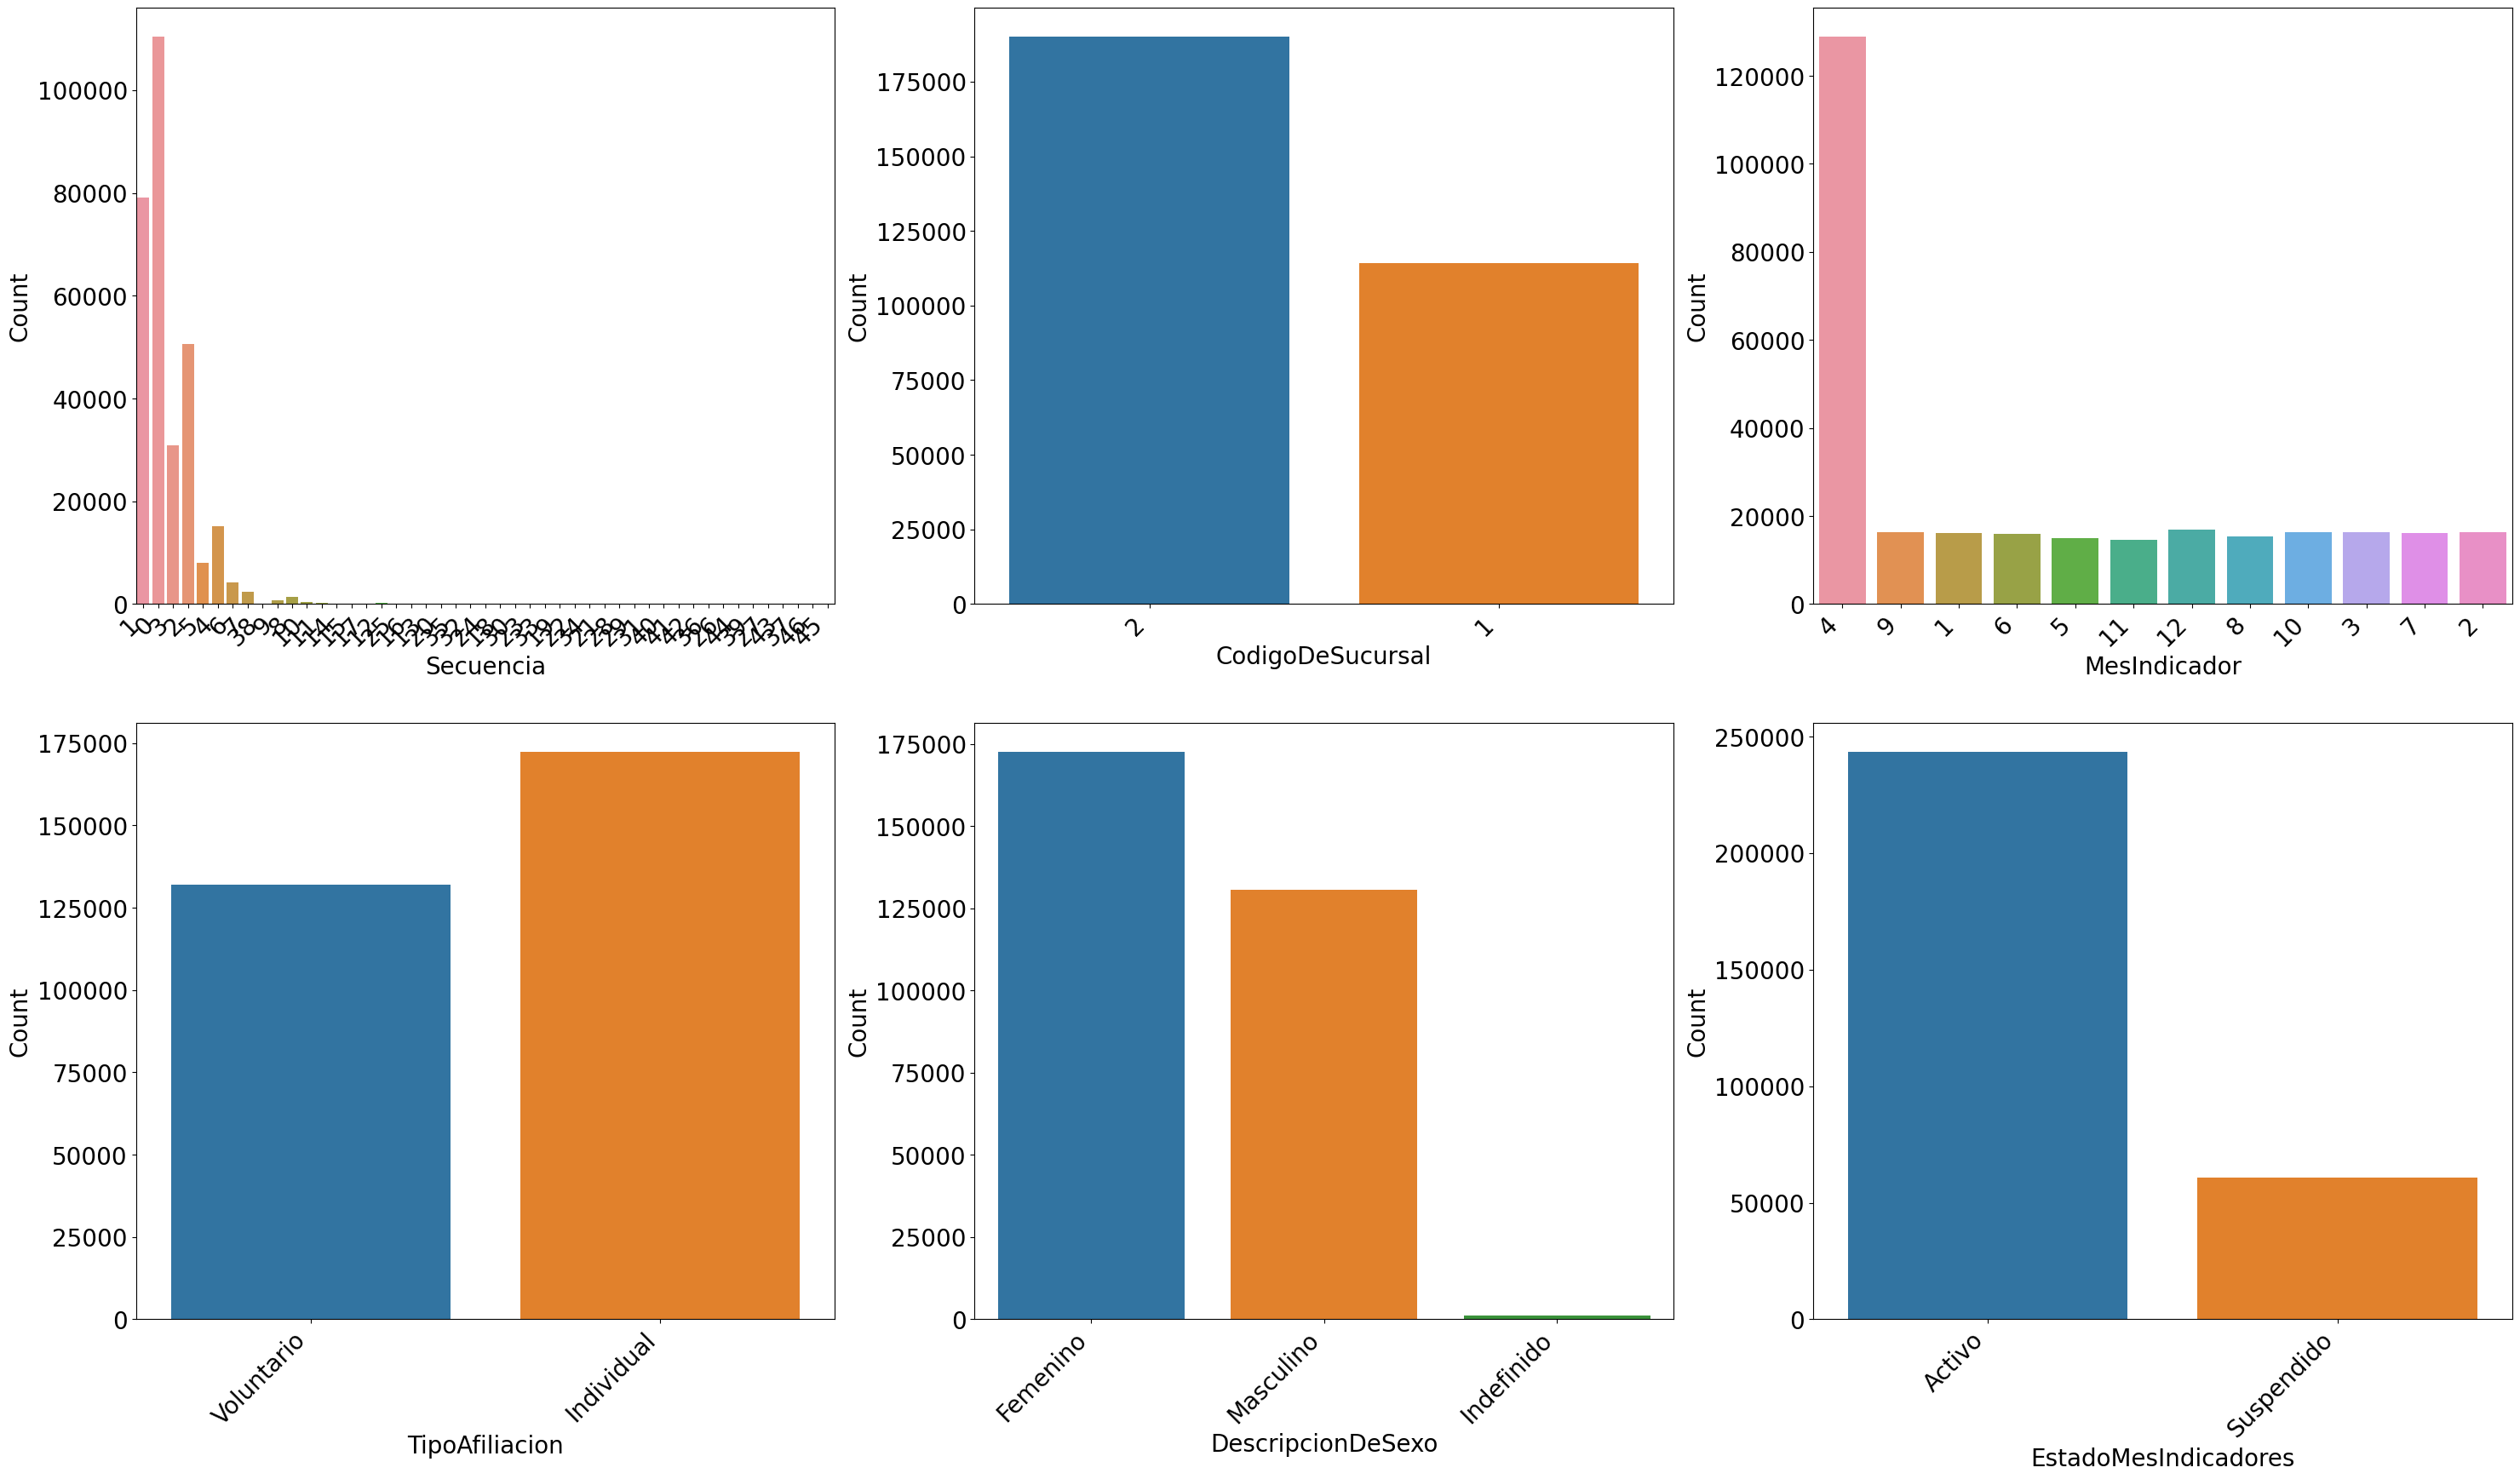

In [14]:
categorical_feature_func(cat_cols[0:6], df, 3)


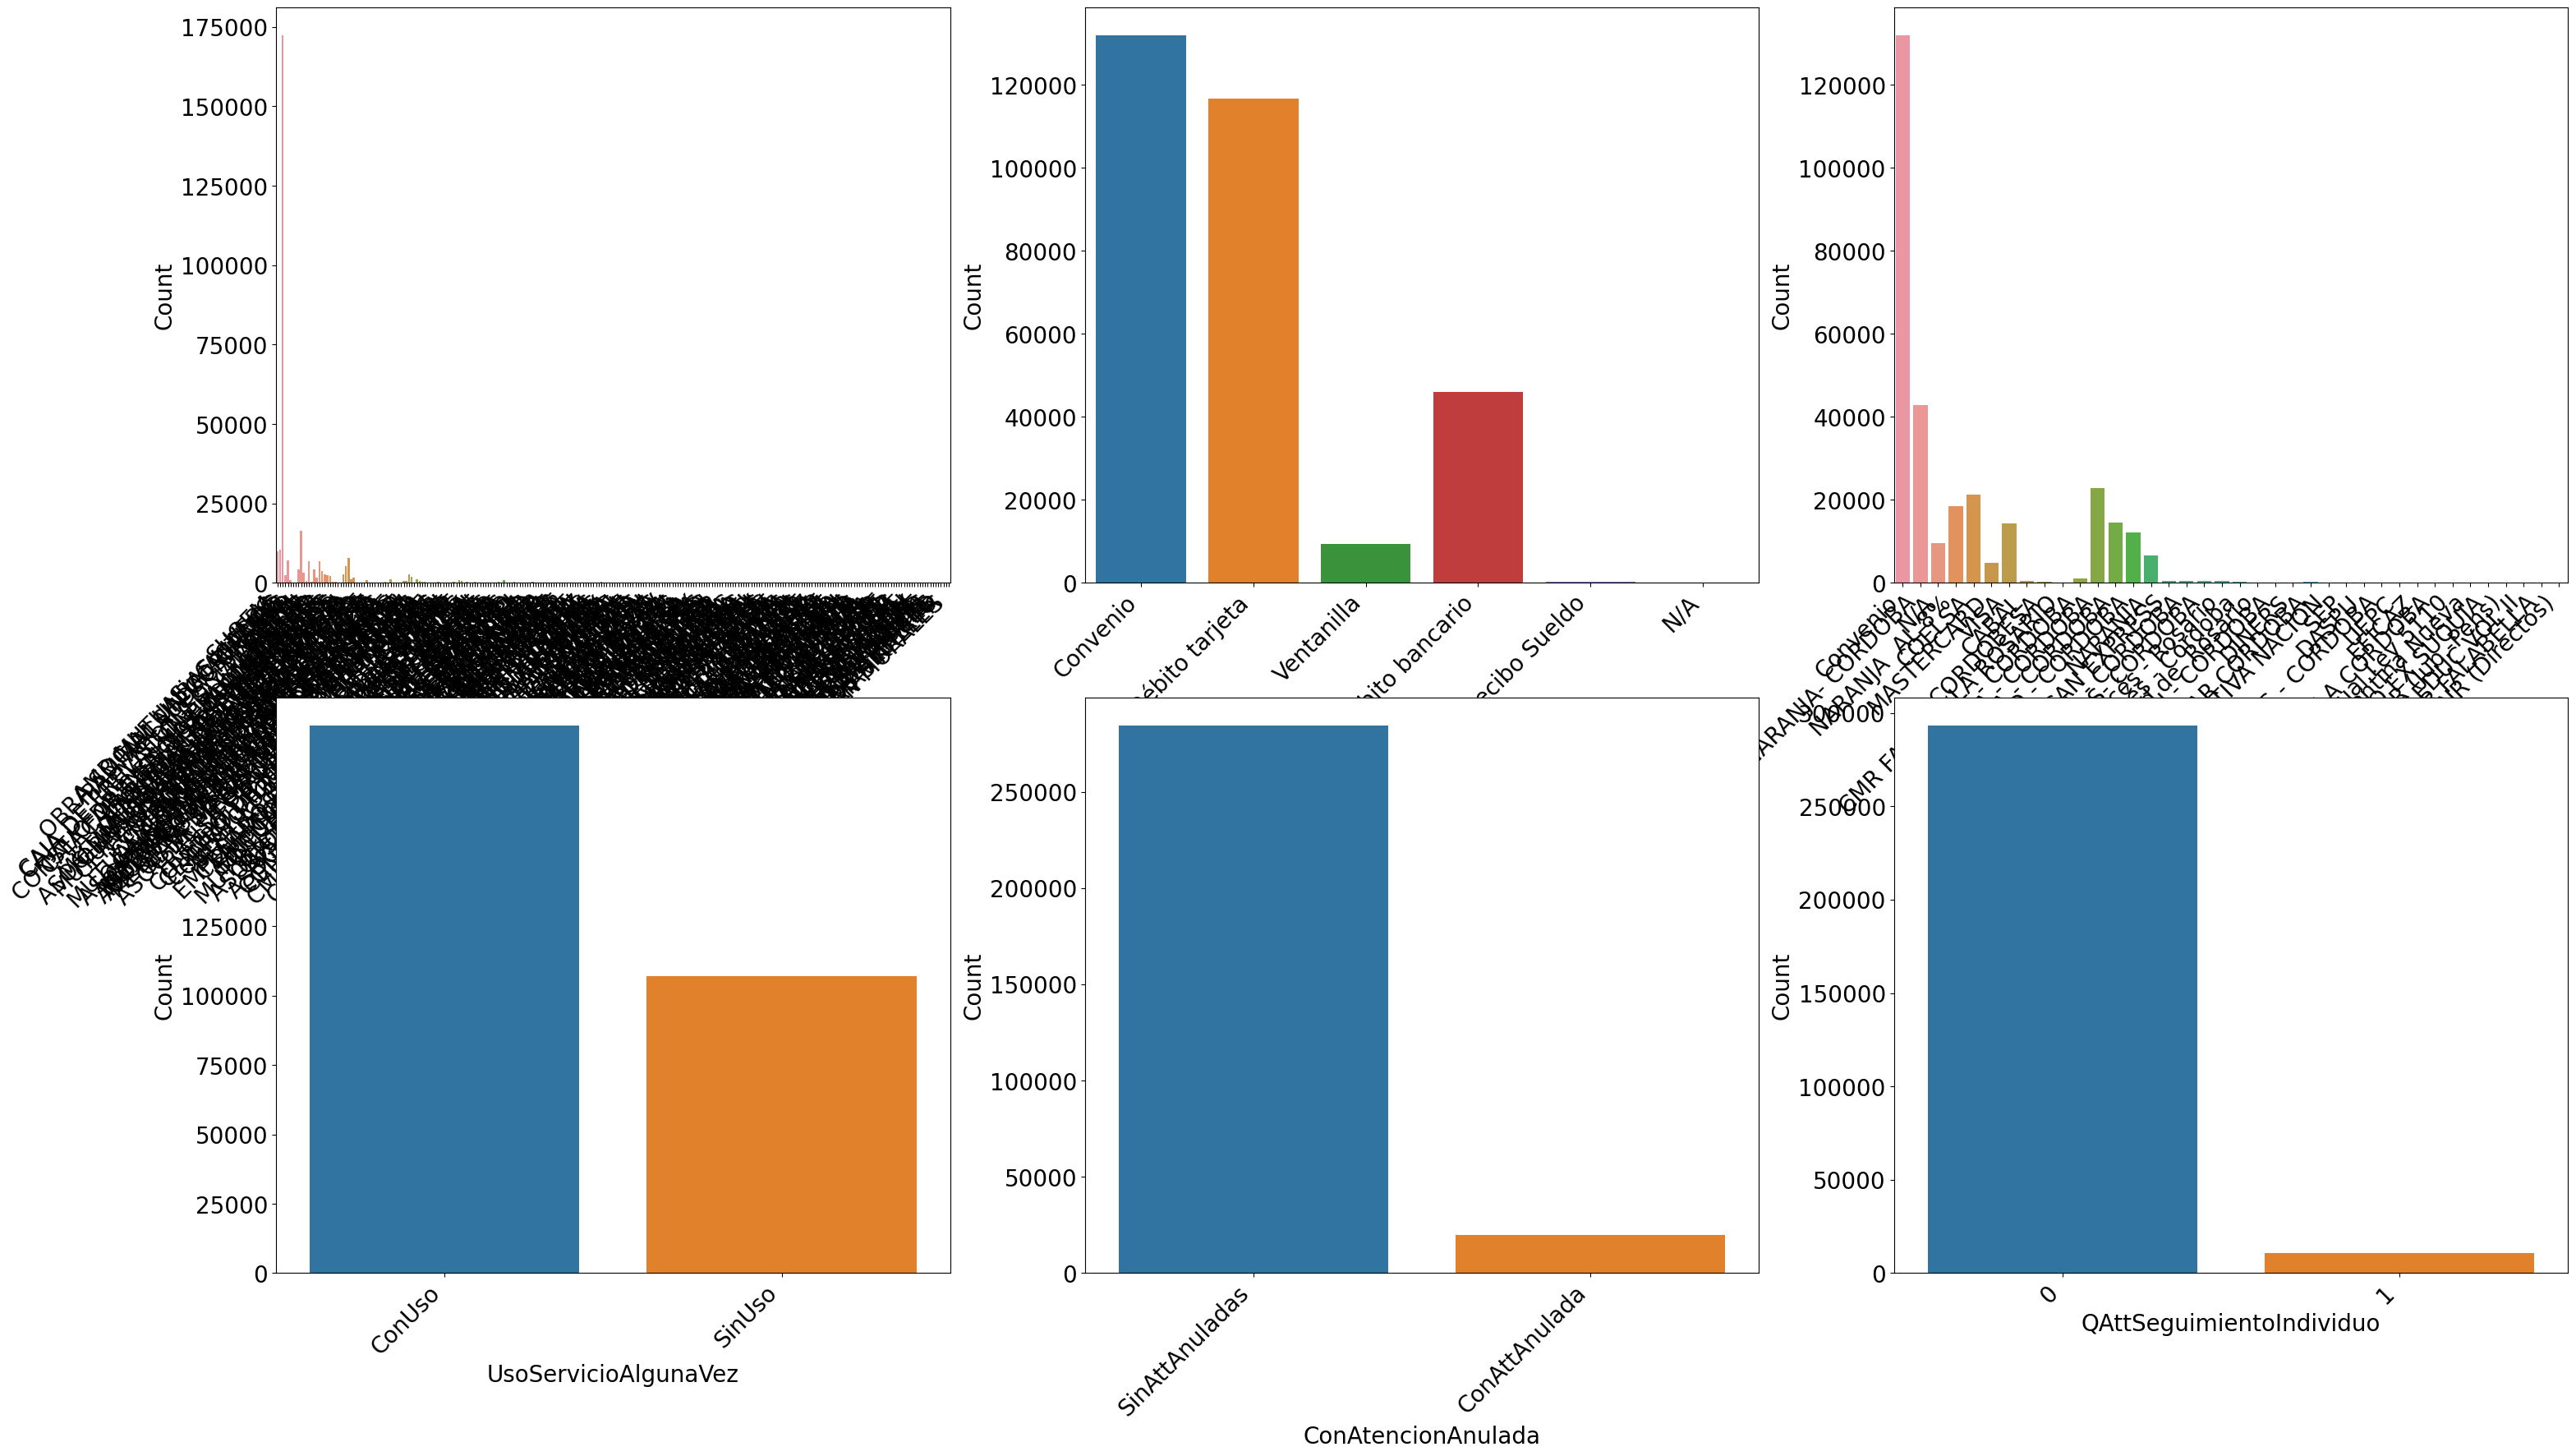

In [15]:
categorical_feature_func(cat_cols[6:12], df, 3)


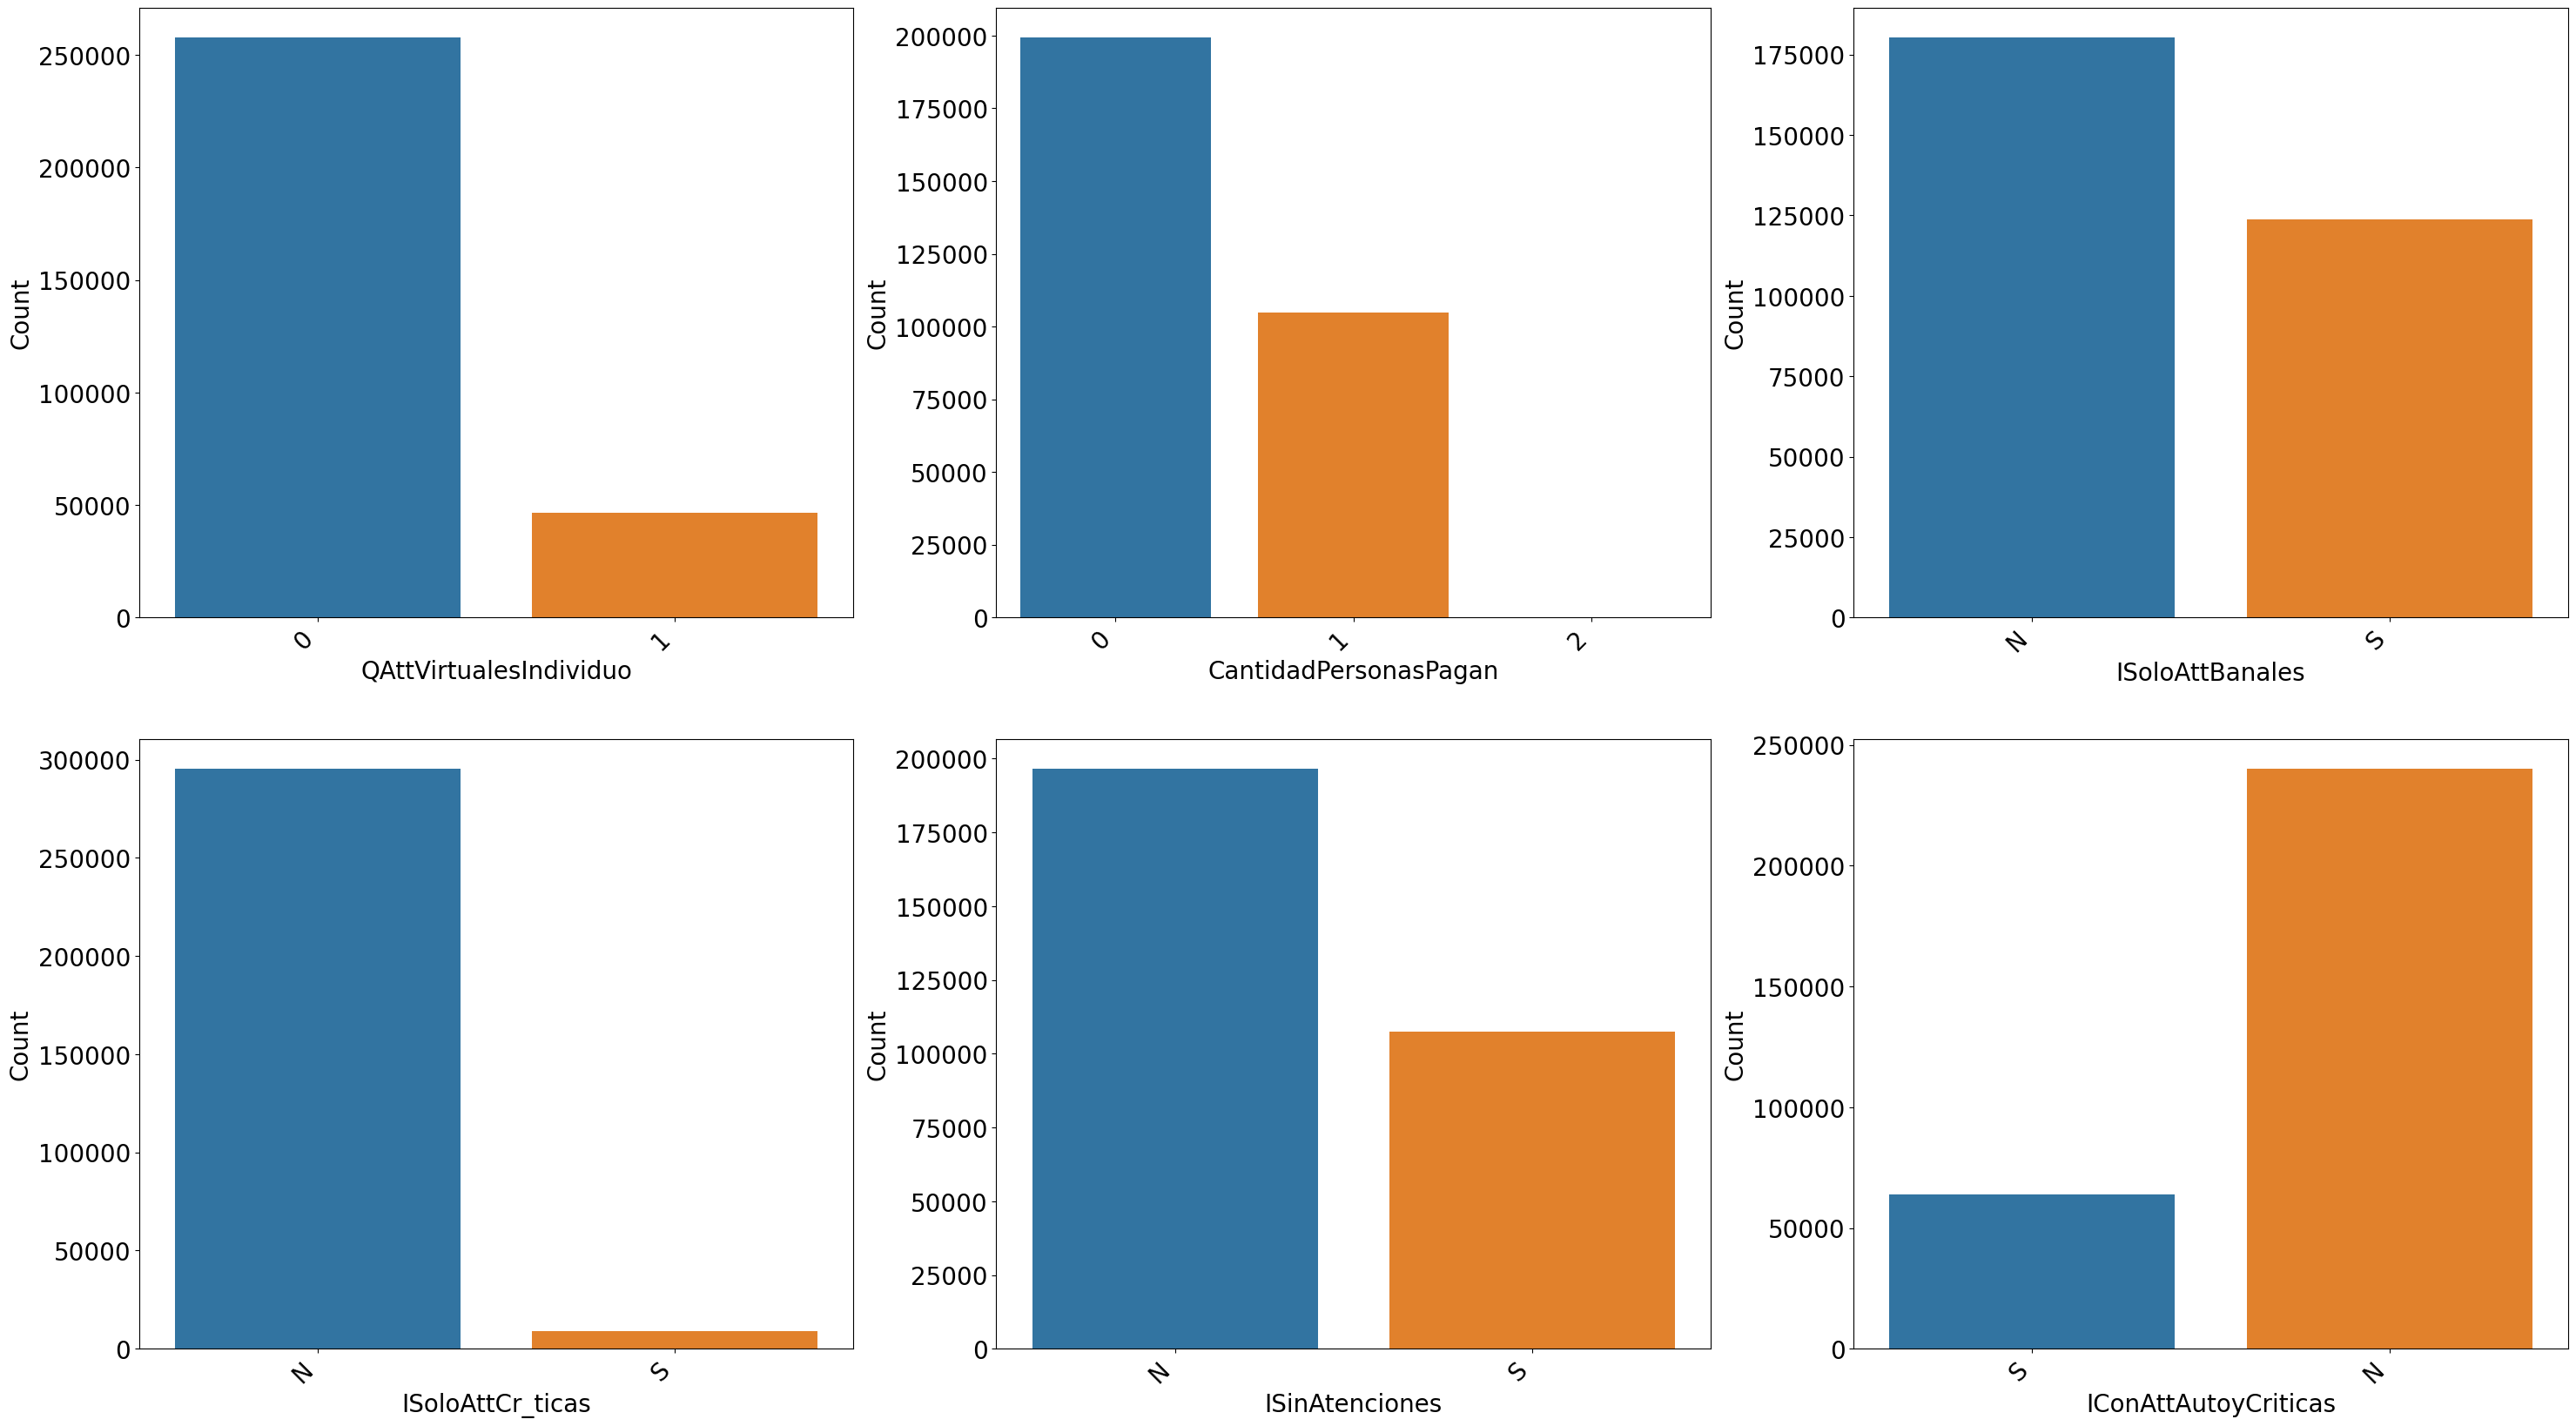

In [16]:
categorical_feature_func(cat_cols[12:18], df, 3)


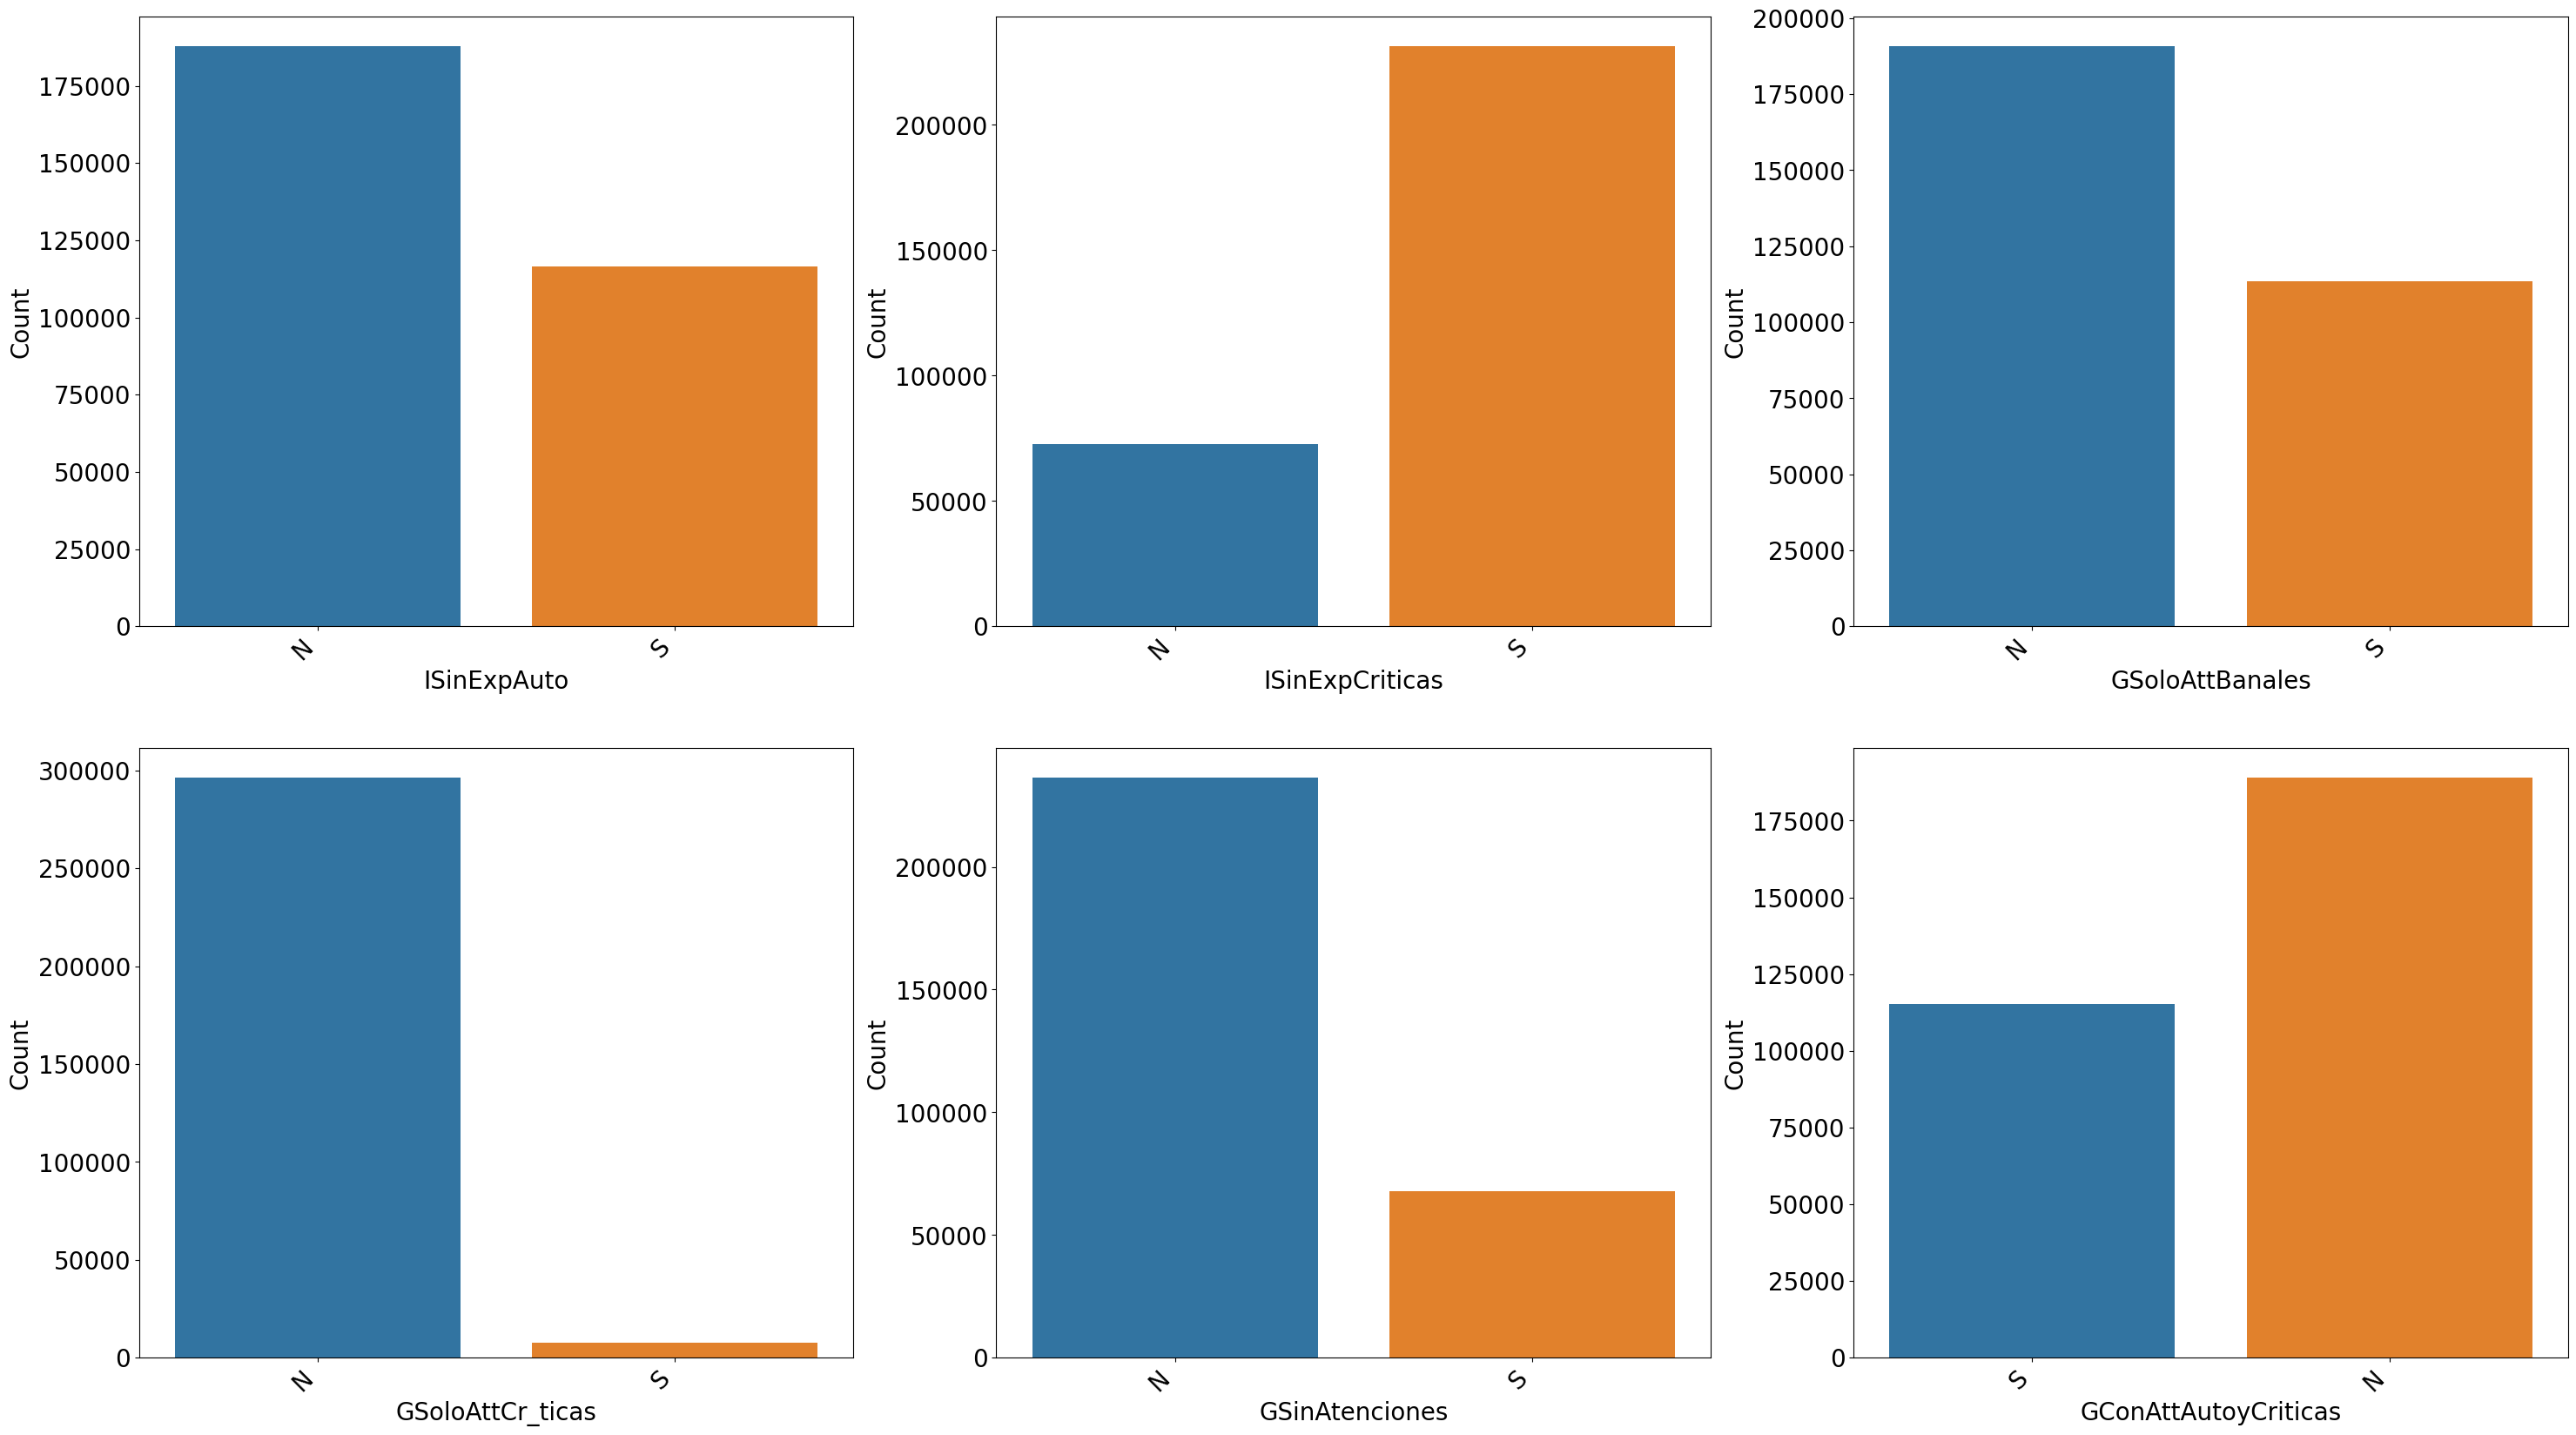

In [17]:
categorical_feature_func(cat_cols[18:24], df, 3)


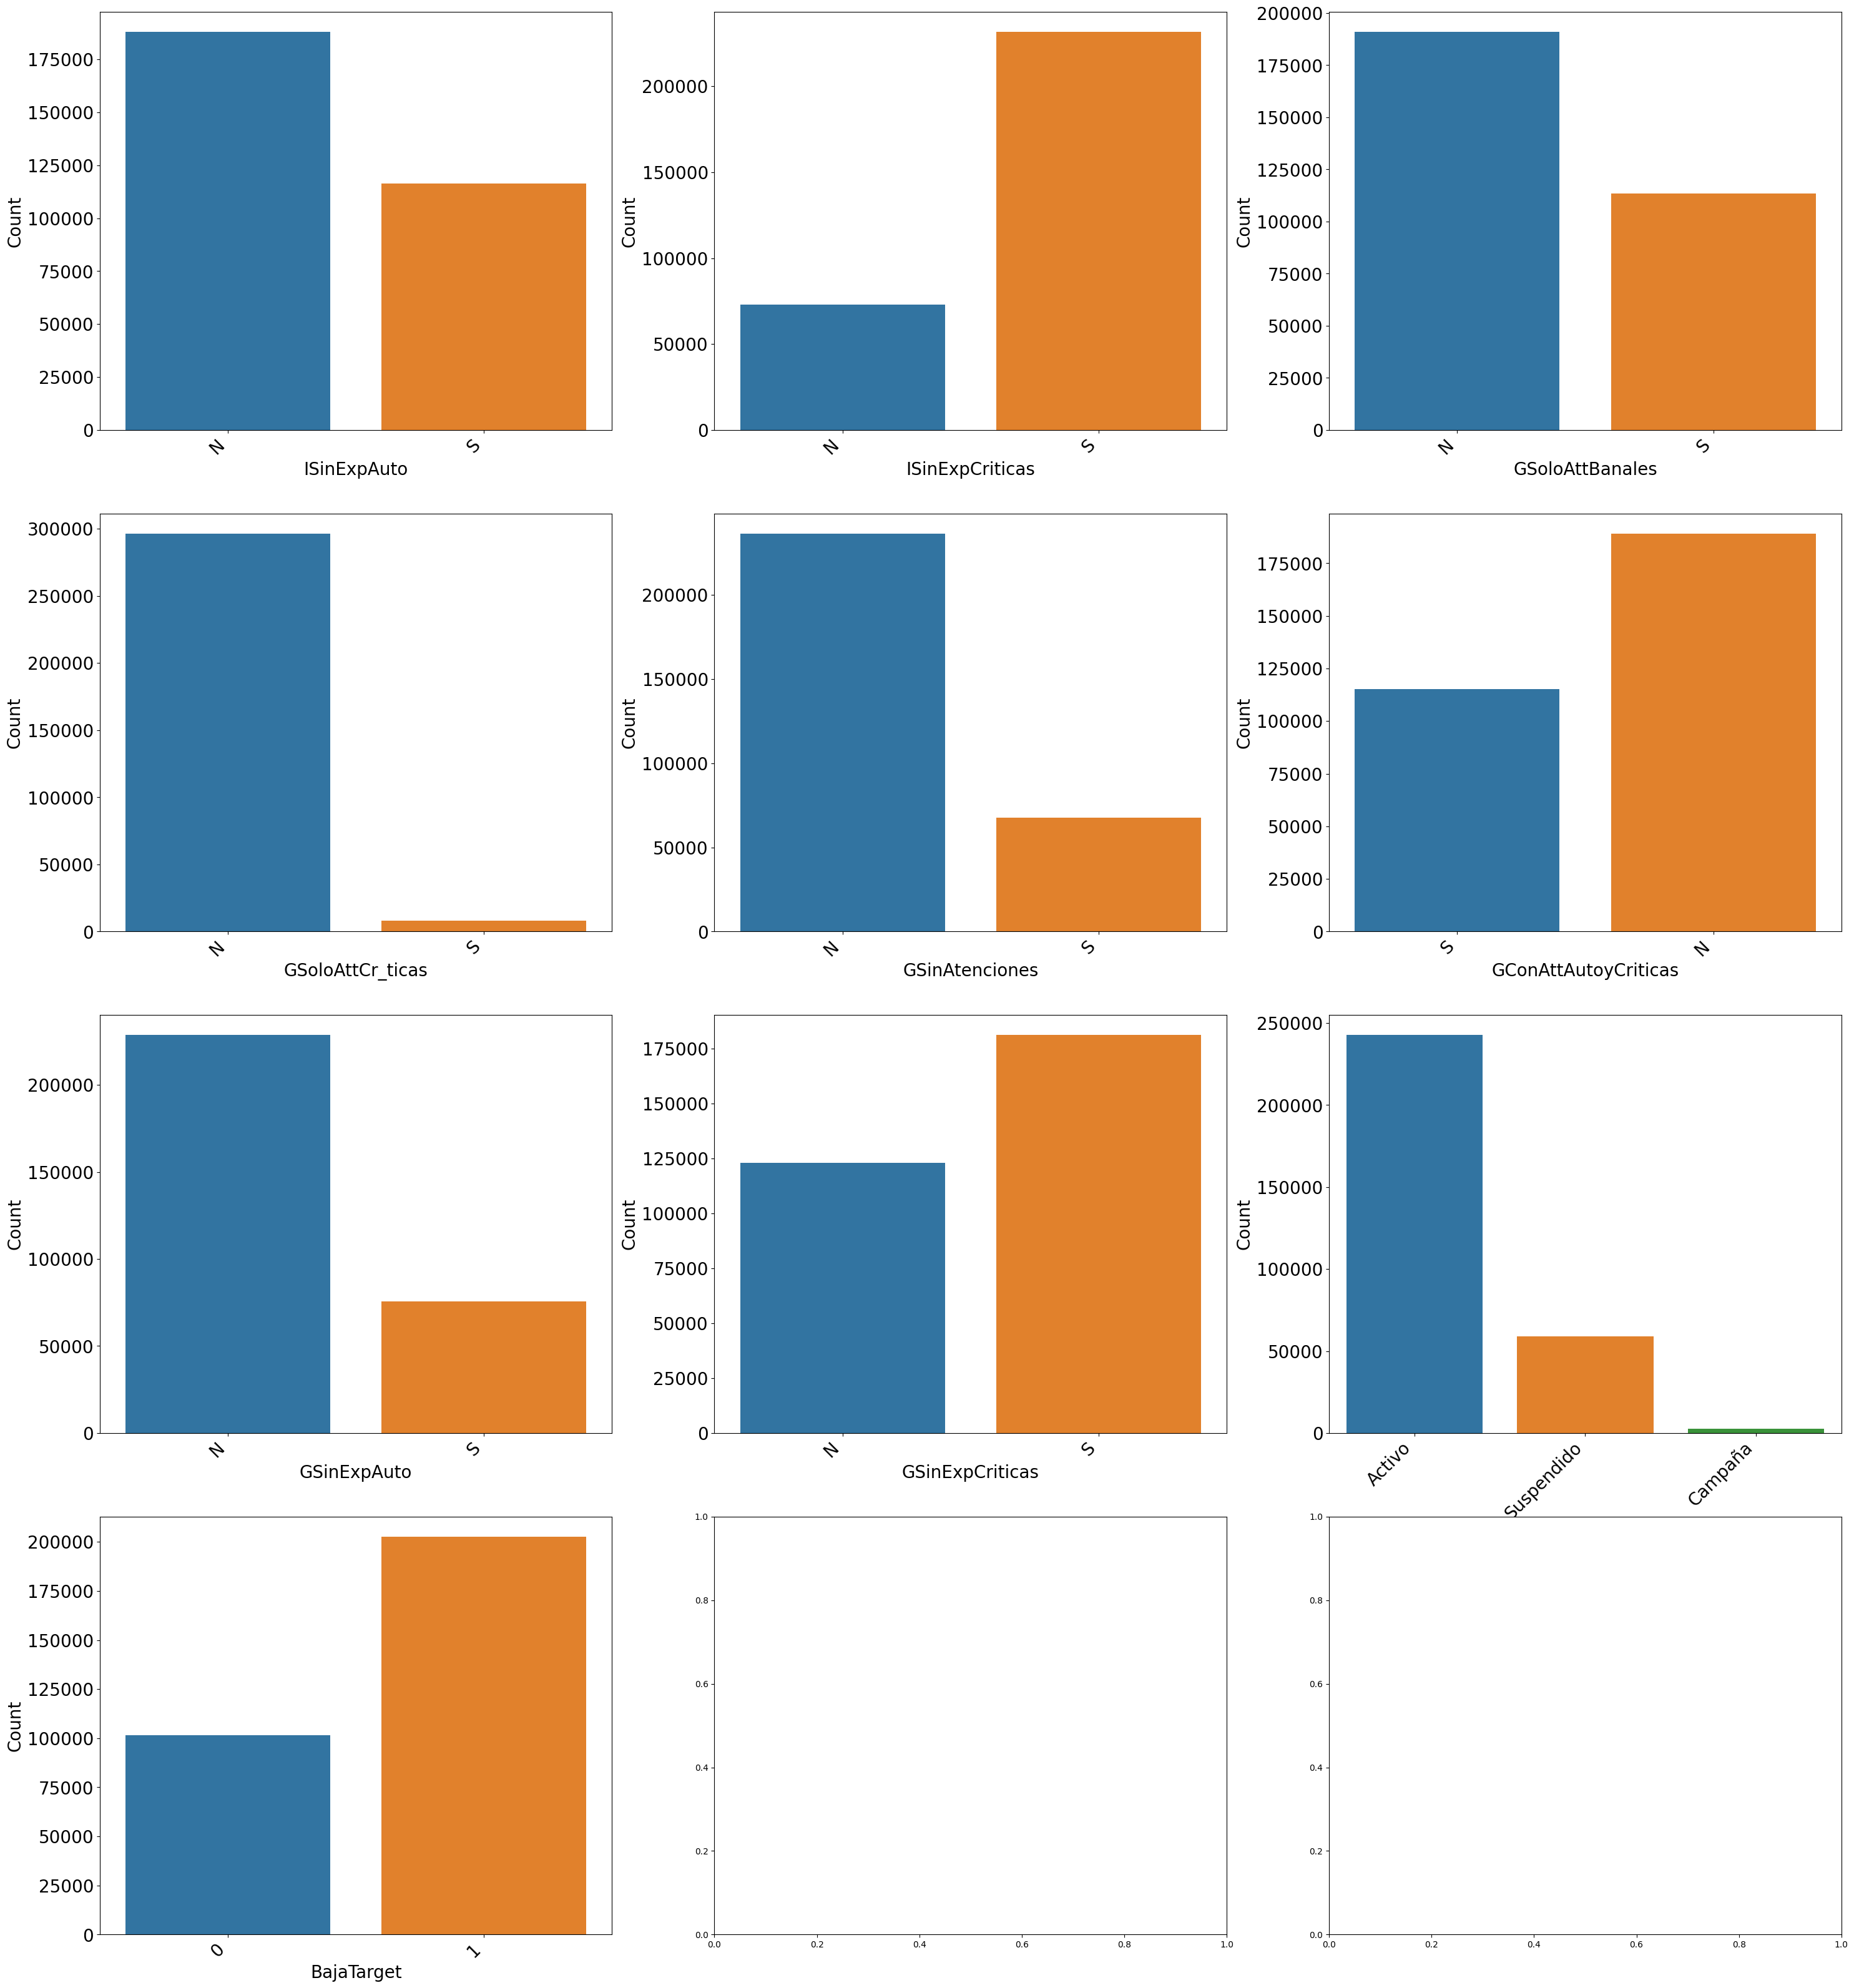

In [18]:
categorical_feature_func(cat_cols[18:], df, 3)

In [19]:
#Visualización bivariada de características categóricas
#relación entre cada variable categórica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def categorical_feature_func(cat_cols, cross_col, data, plot_columnas):

    plot_filas = math.ceil(len(cat_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(cat_cols):
            pd.crosstab(data[col],data[cross_col]).plot(kind="bar", rot=45, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(cat_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            pd.crosstab(data[col],data[cross_col]).plot( kind="bar", rot=45, ax = axs[axs_fila][axs_col])
            #sns.countplot( x=col,hue=cross_col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
           


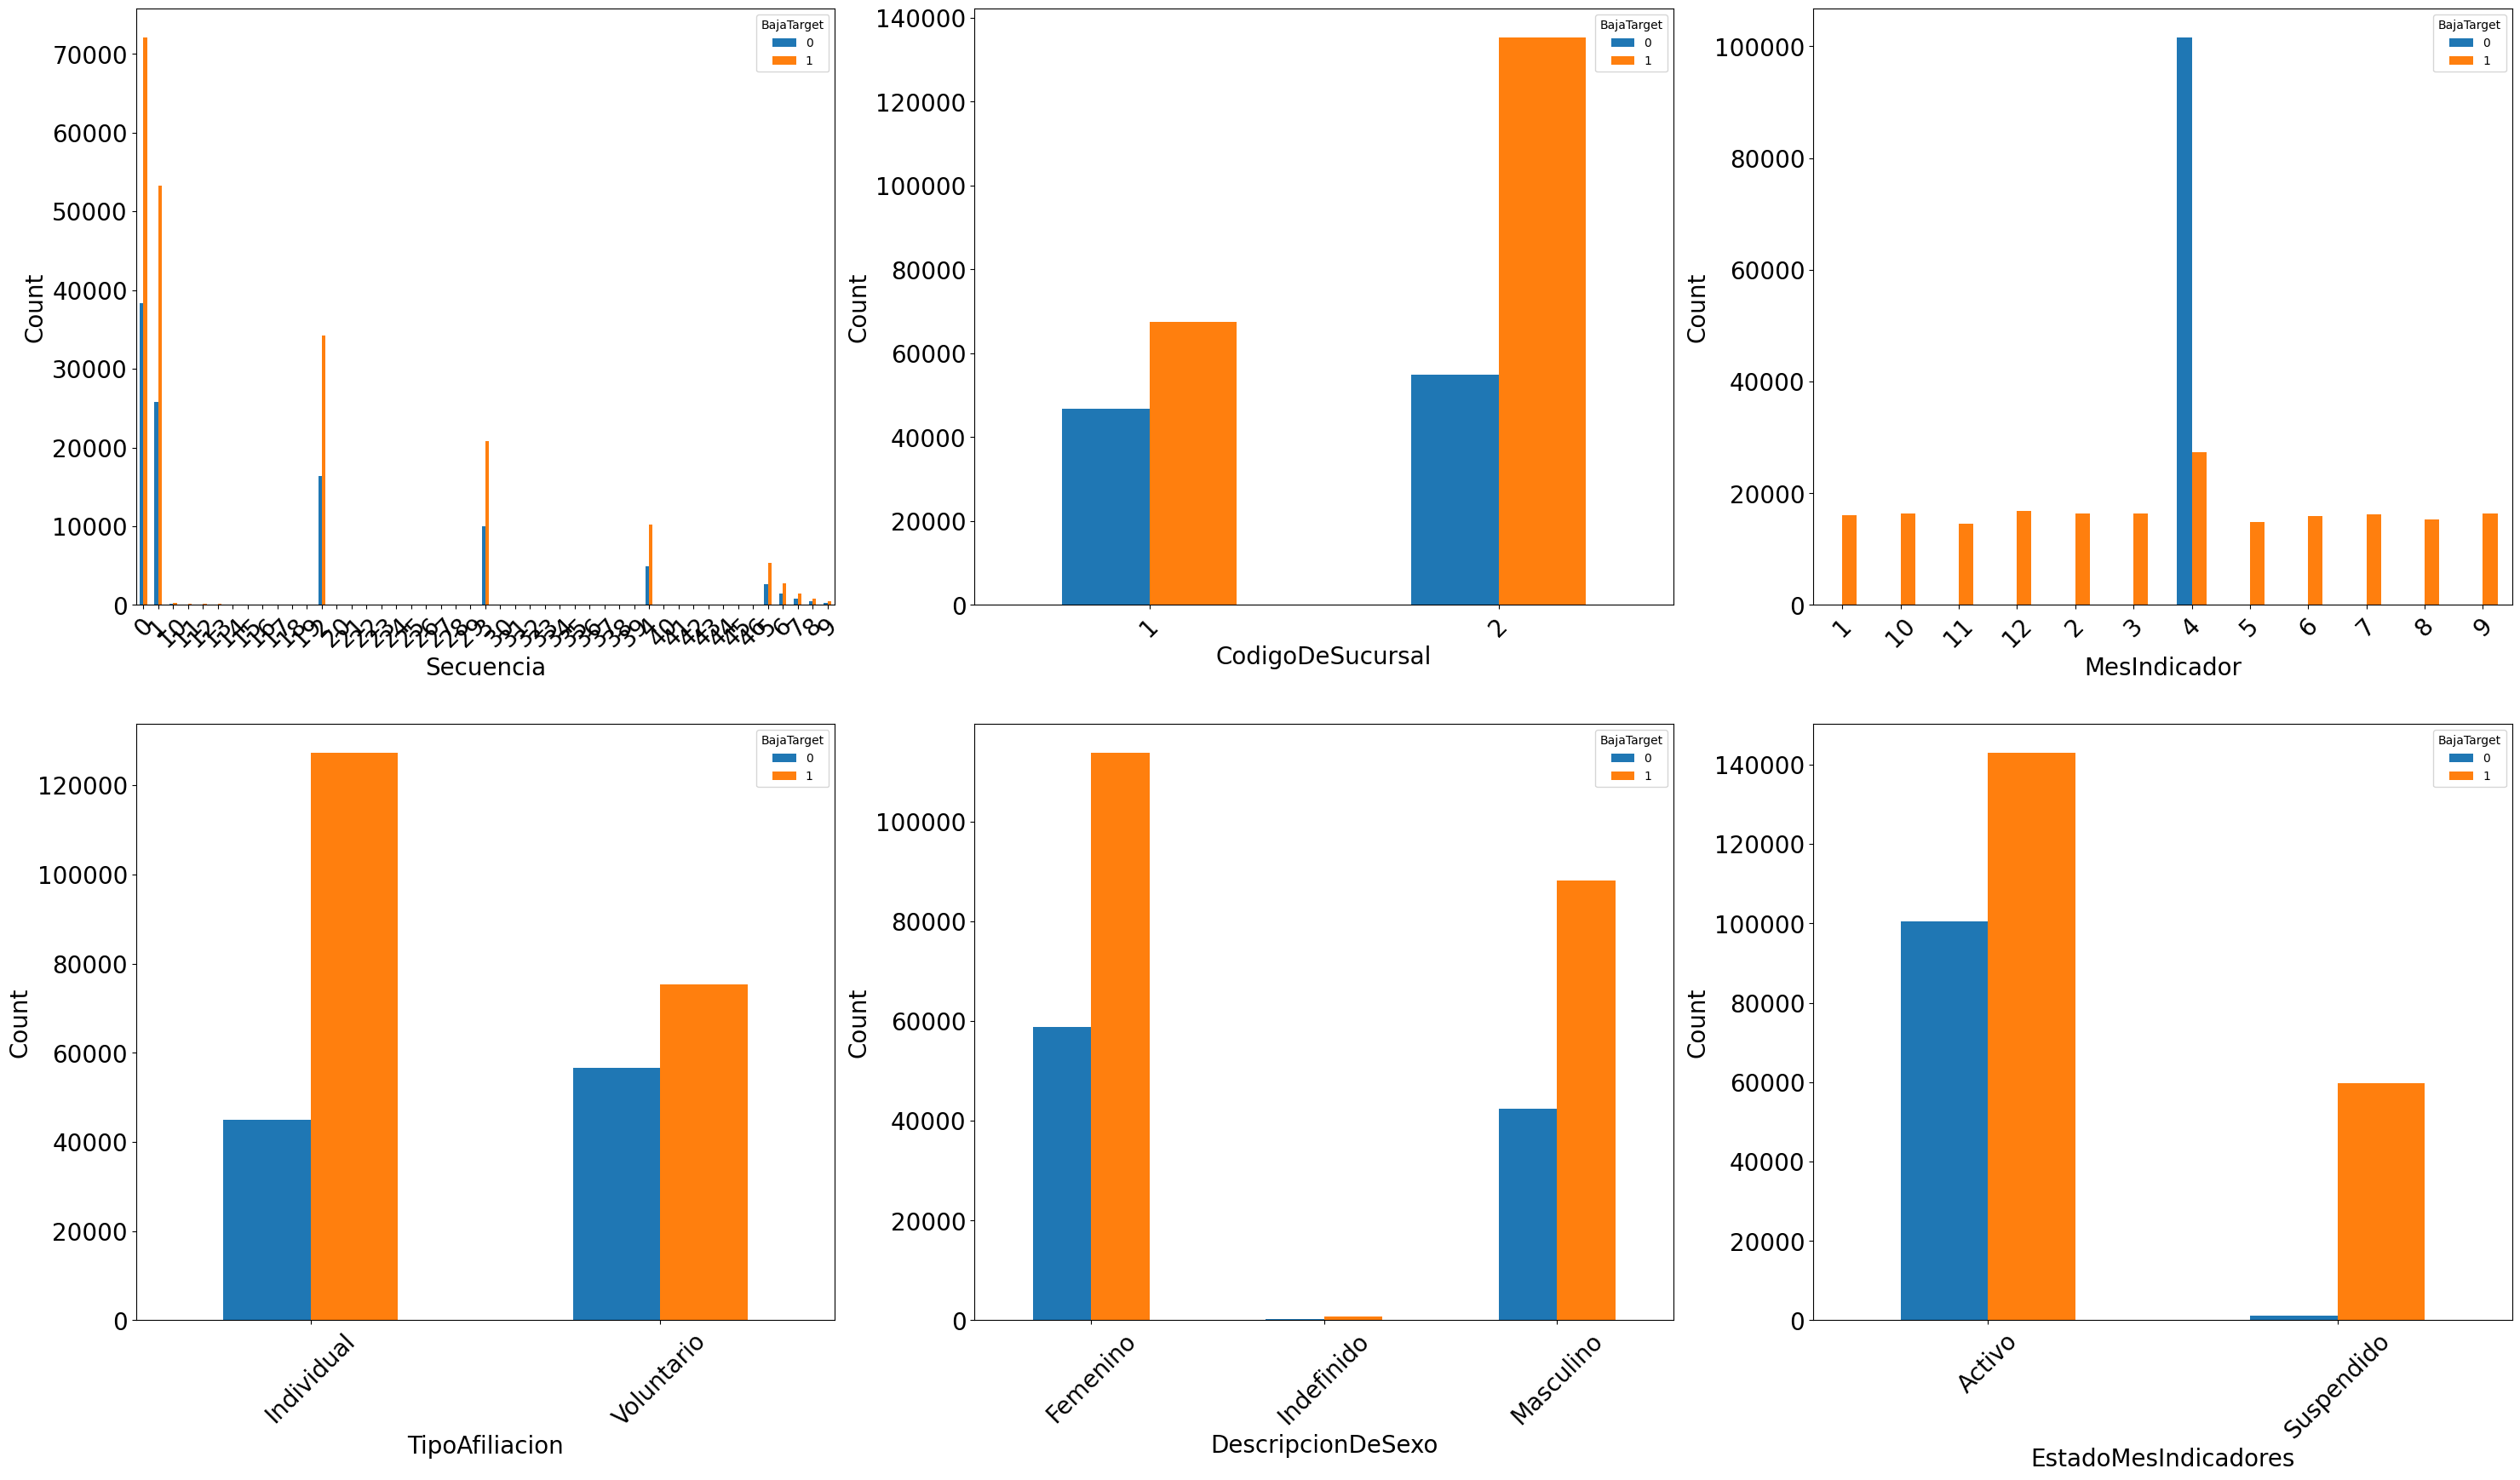

In [20]:
categorical_feature_func(cat_cols[0:6], 'BajaTarget', df, 3)

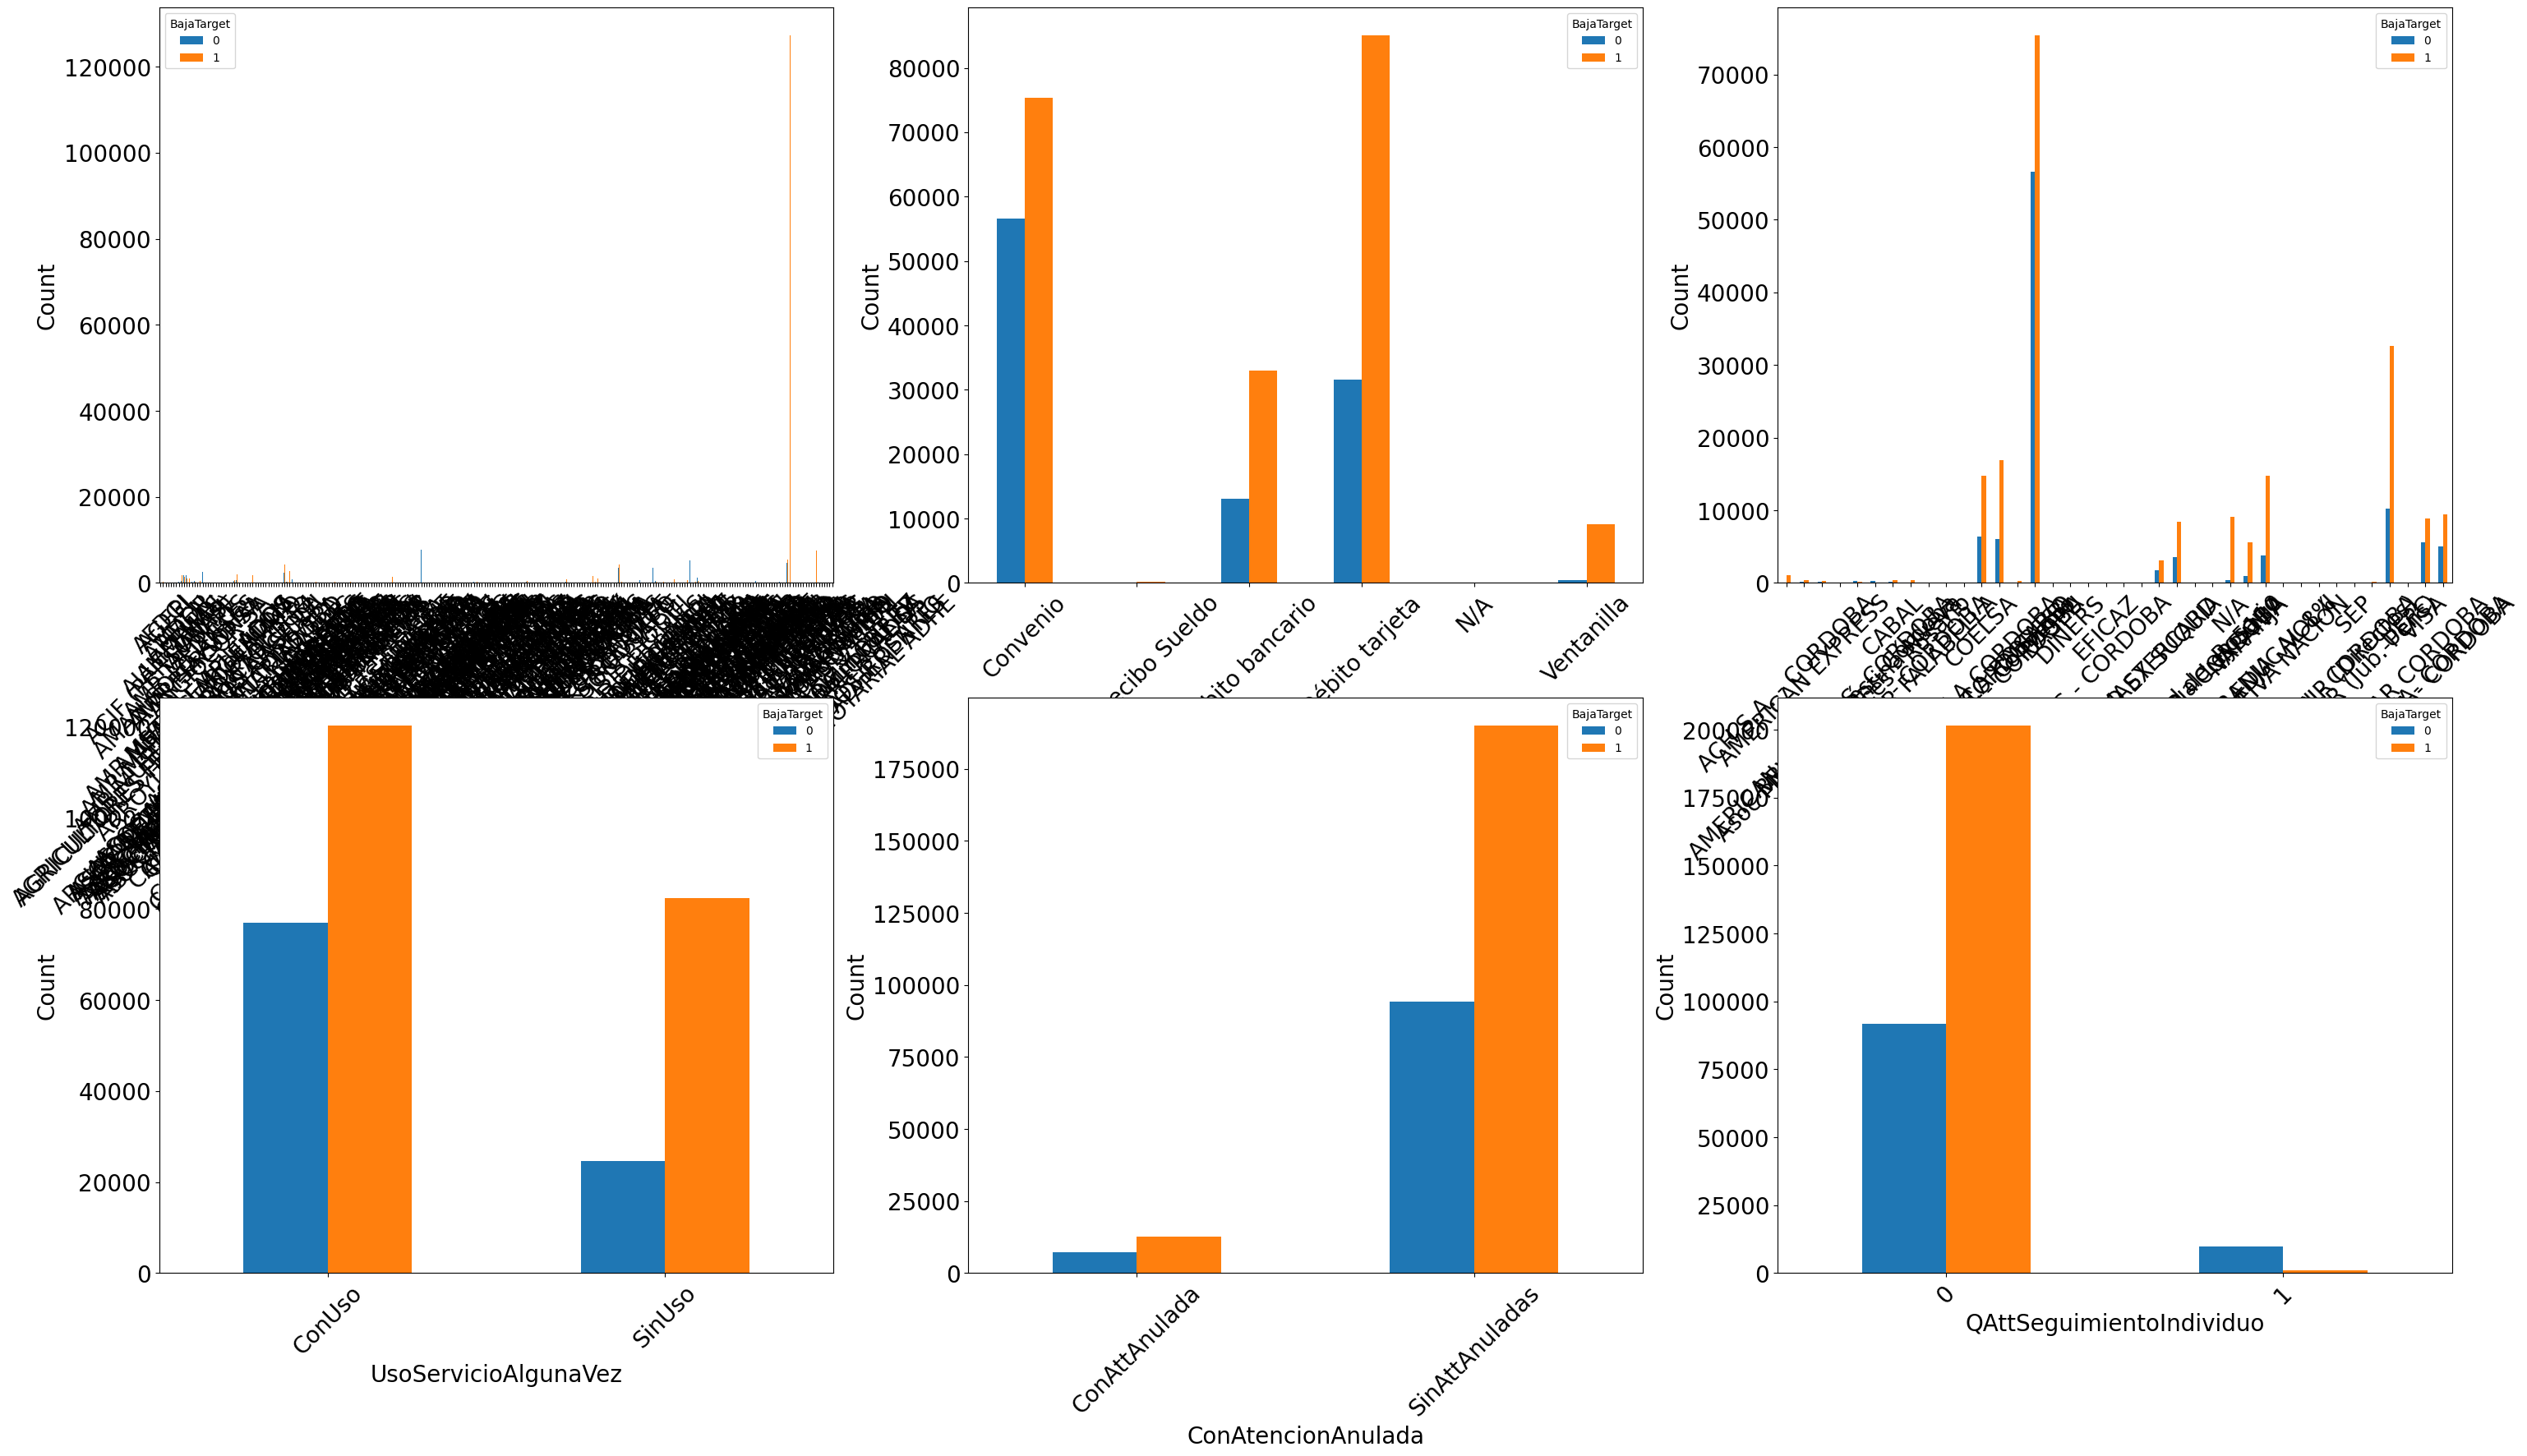

In [21]:
categorical_feature_func(cat_cols[6:12], 'BajaTarget', df, 3)

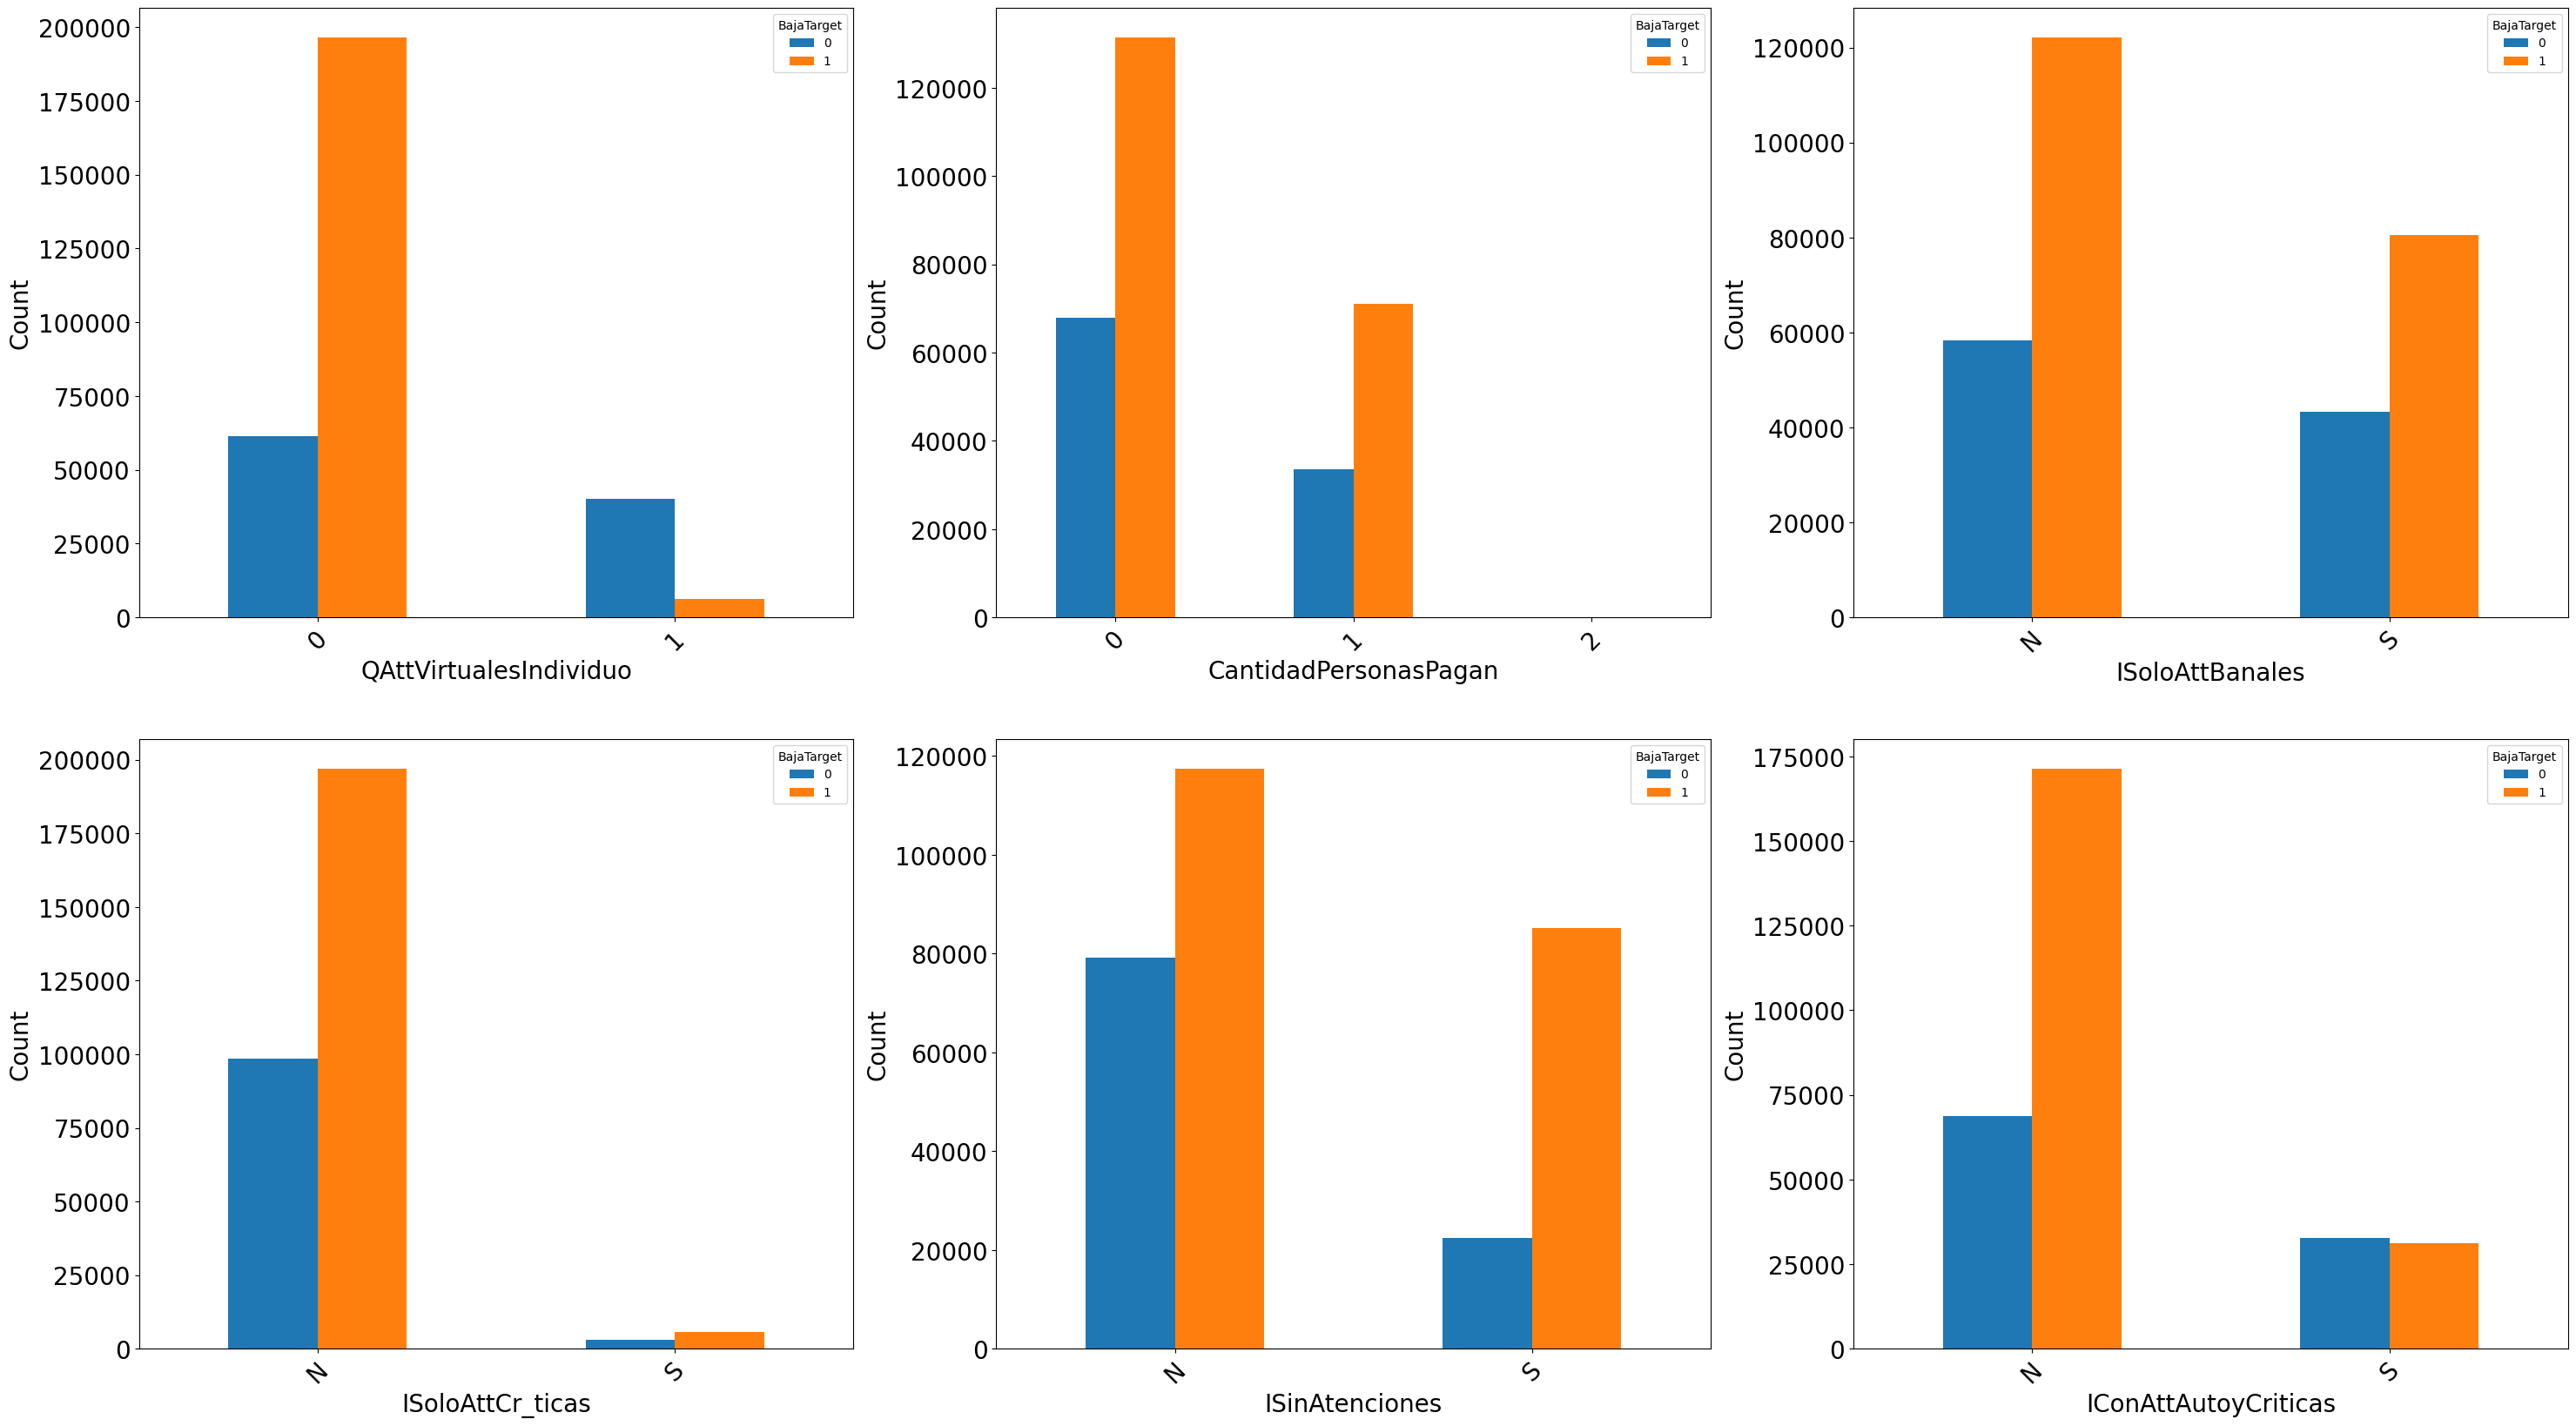

In [22]:
categorical_feature_func(cat_cols[12:18], 'BajaTarget', df, 3)

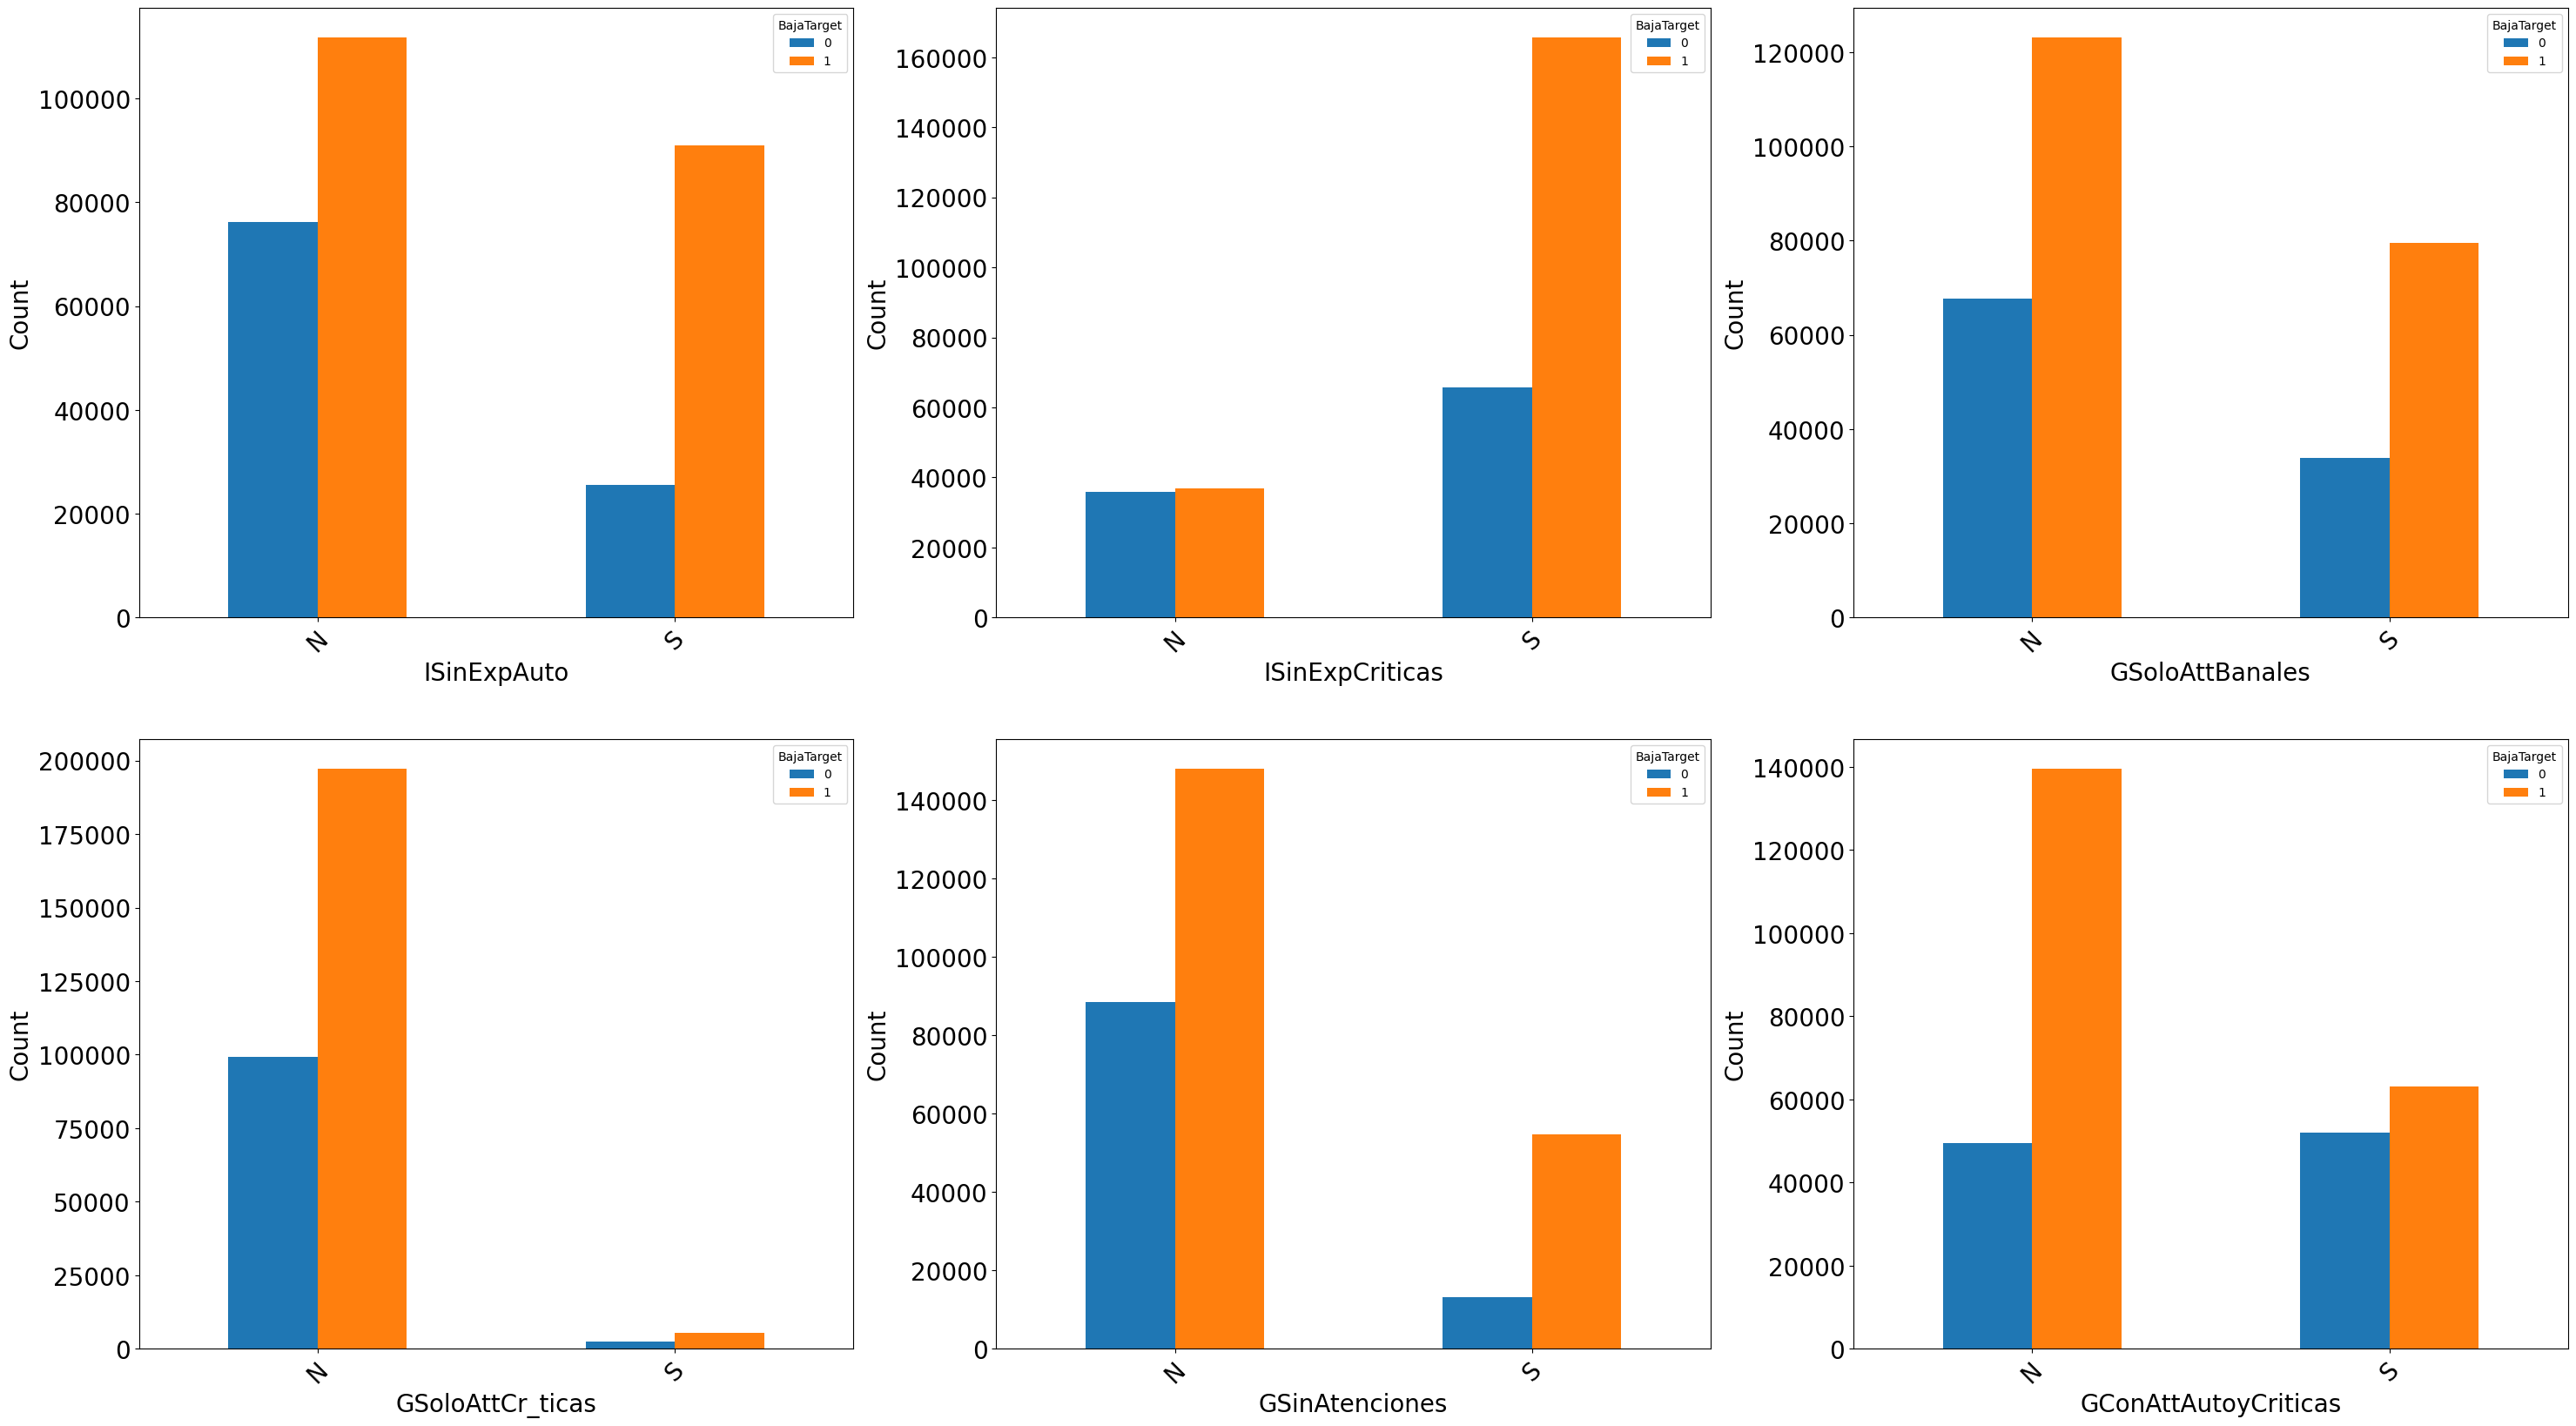

In [23]:
categorical_feature_func(cat_cols[18:24], 'BajaTarget', df, 3)

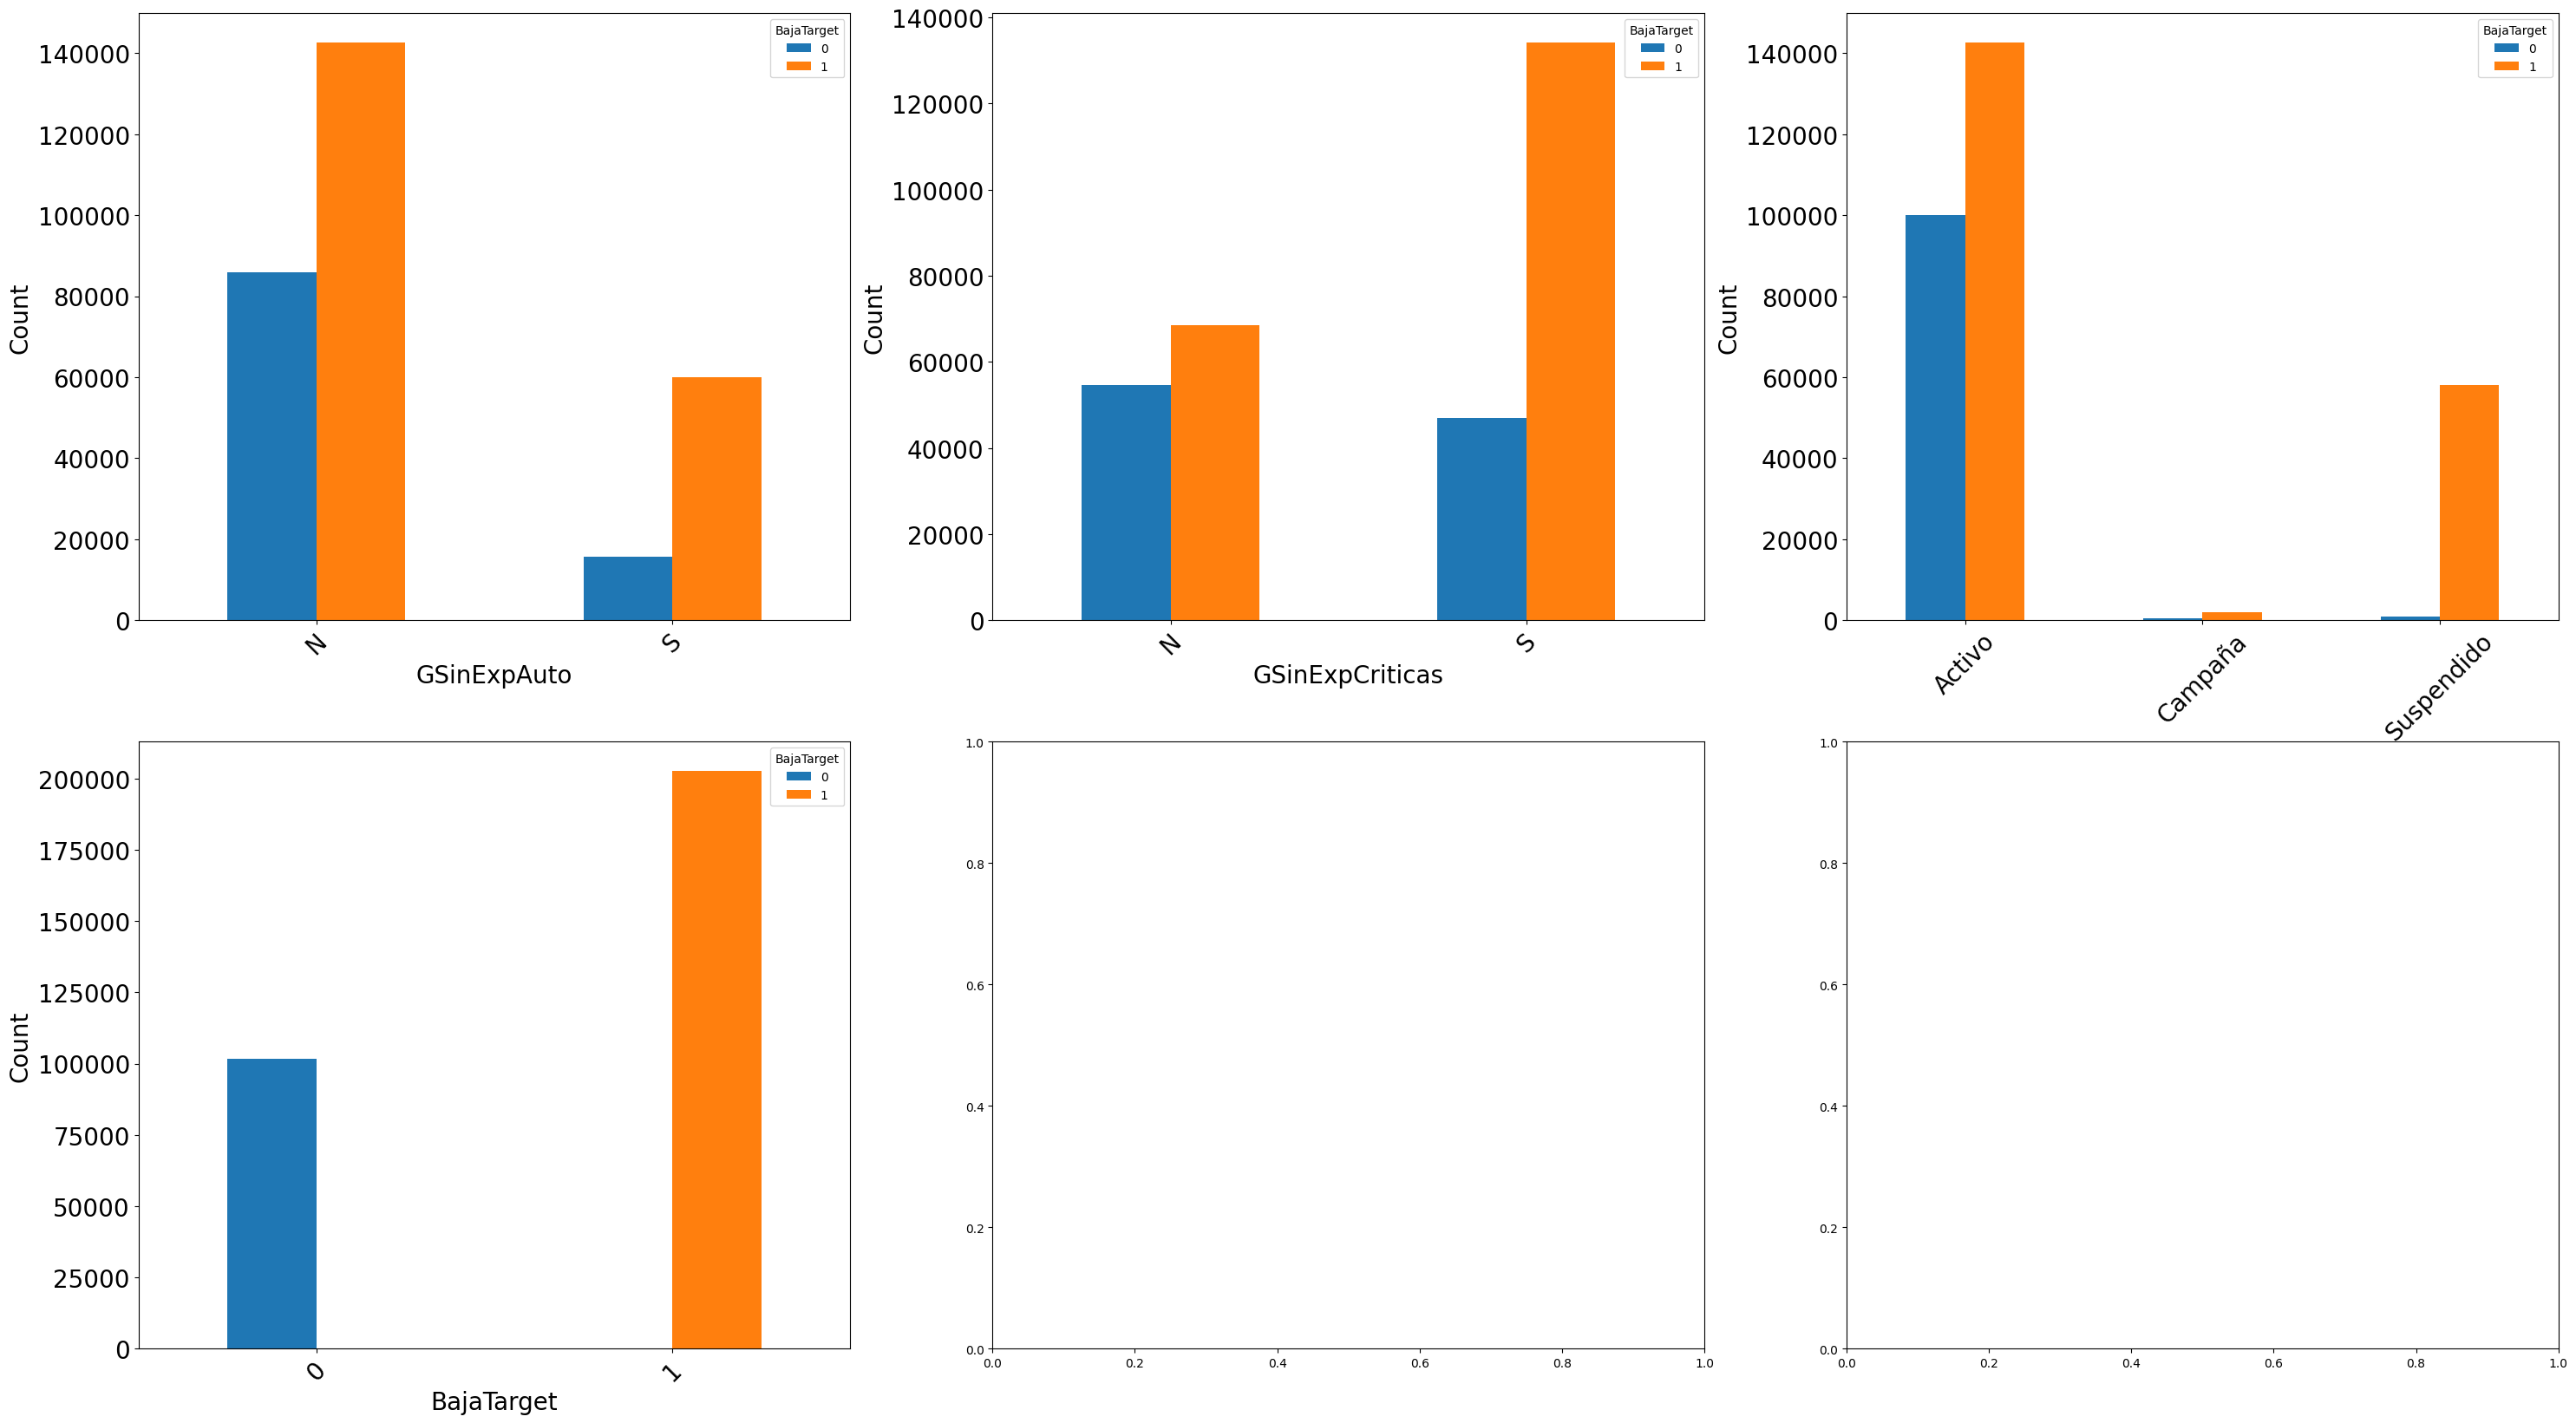

In [24]:
categorical_feature_func(cat_cols[24:], 'BajaTarget', df, 3)

In [25]:
# Univariate visualization of numerical features
def numeric_features_func(num_cols, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.histplot(x=col,data=data, kde=True, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.histplot(x=col,data=data, kde=True, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    plt.tight_layout()
    

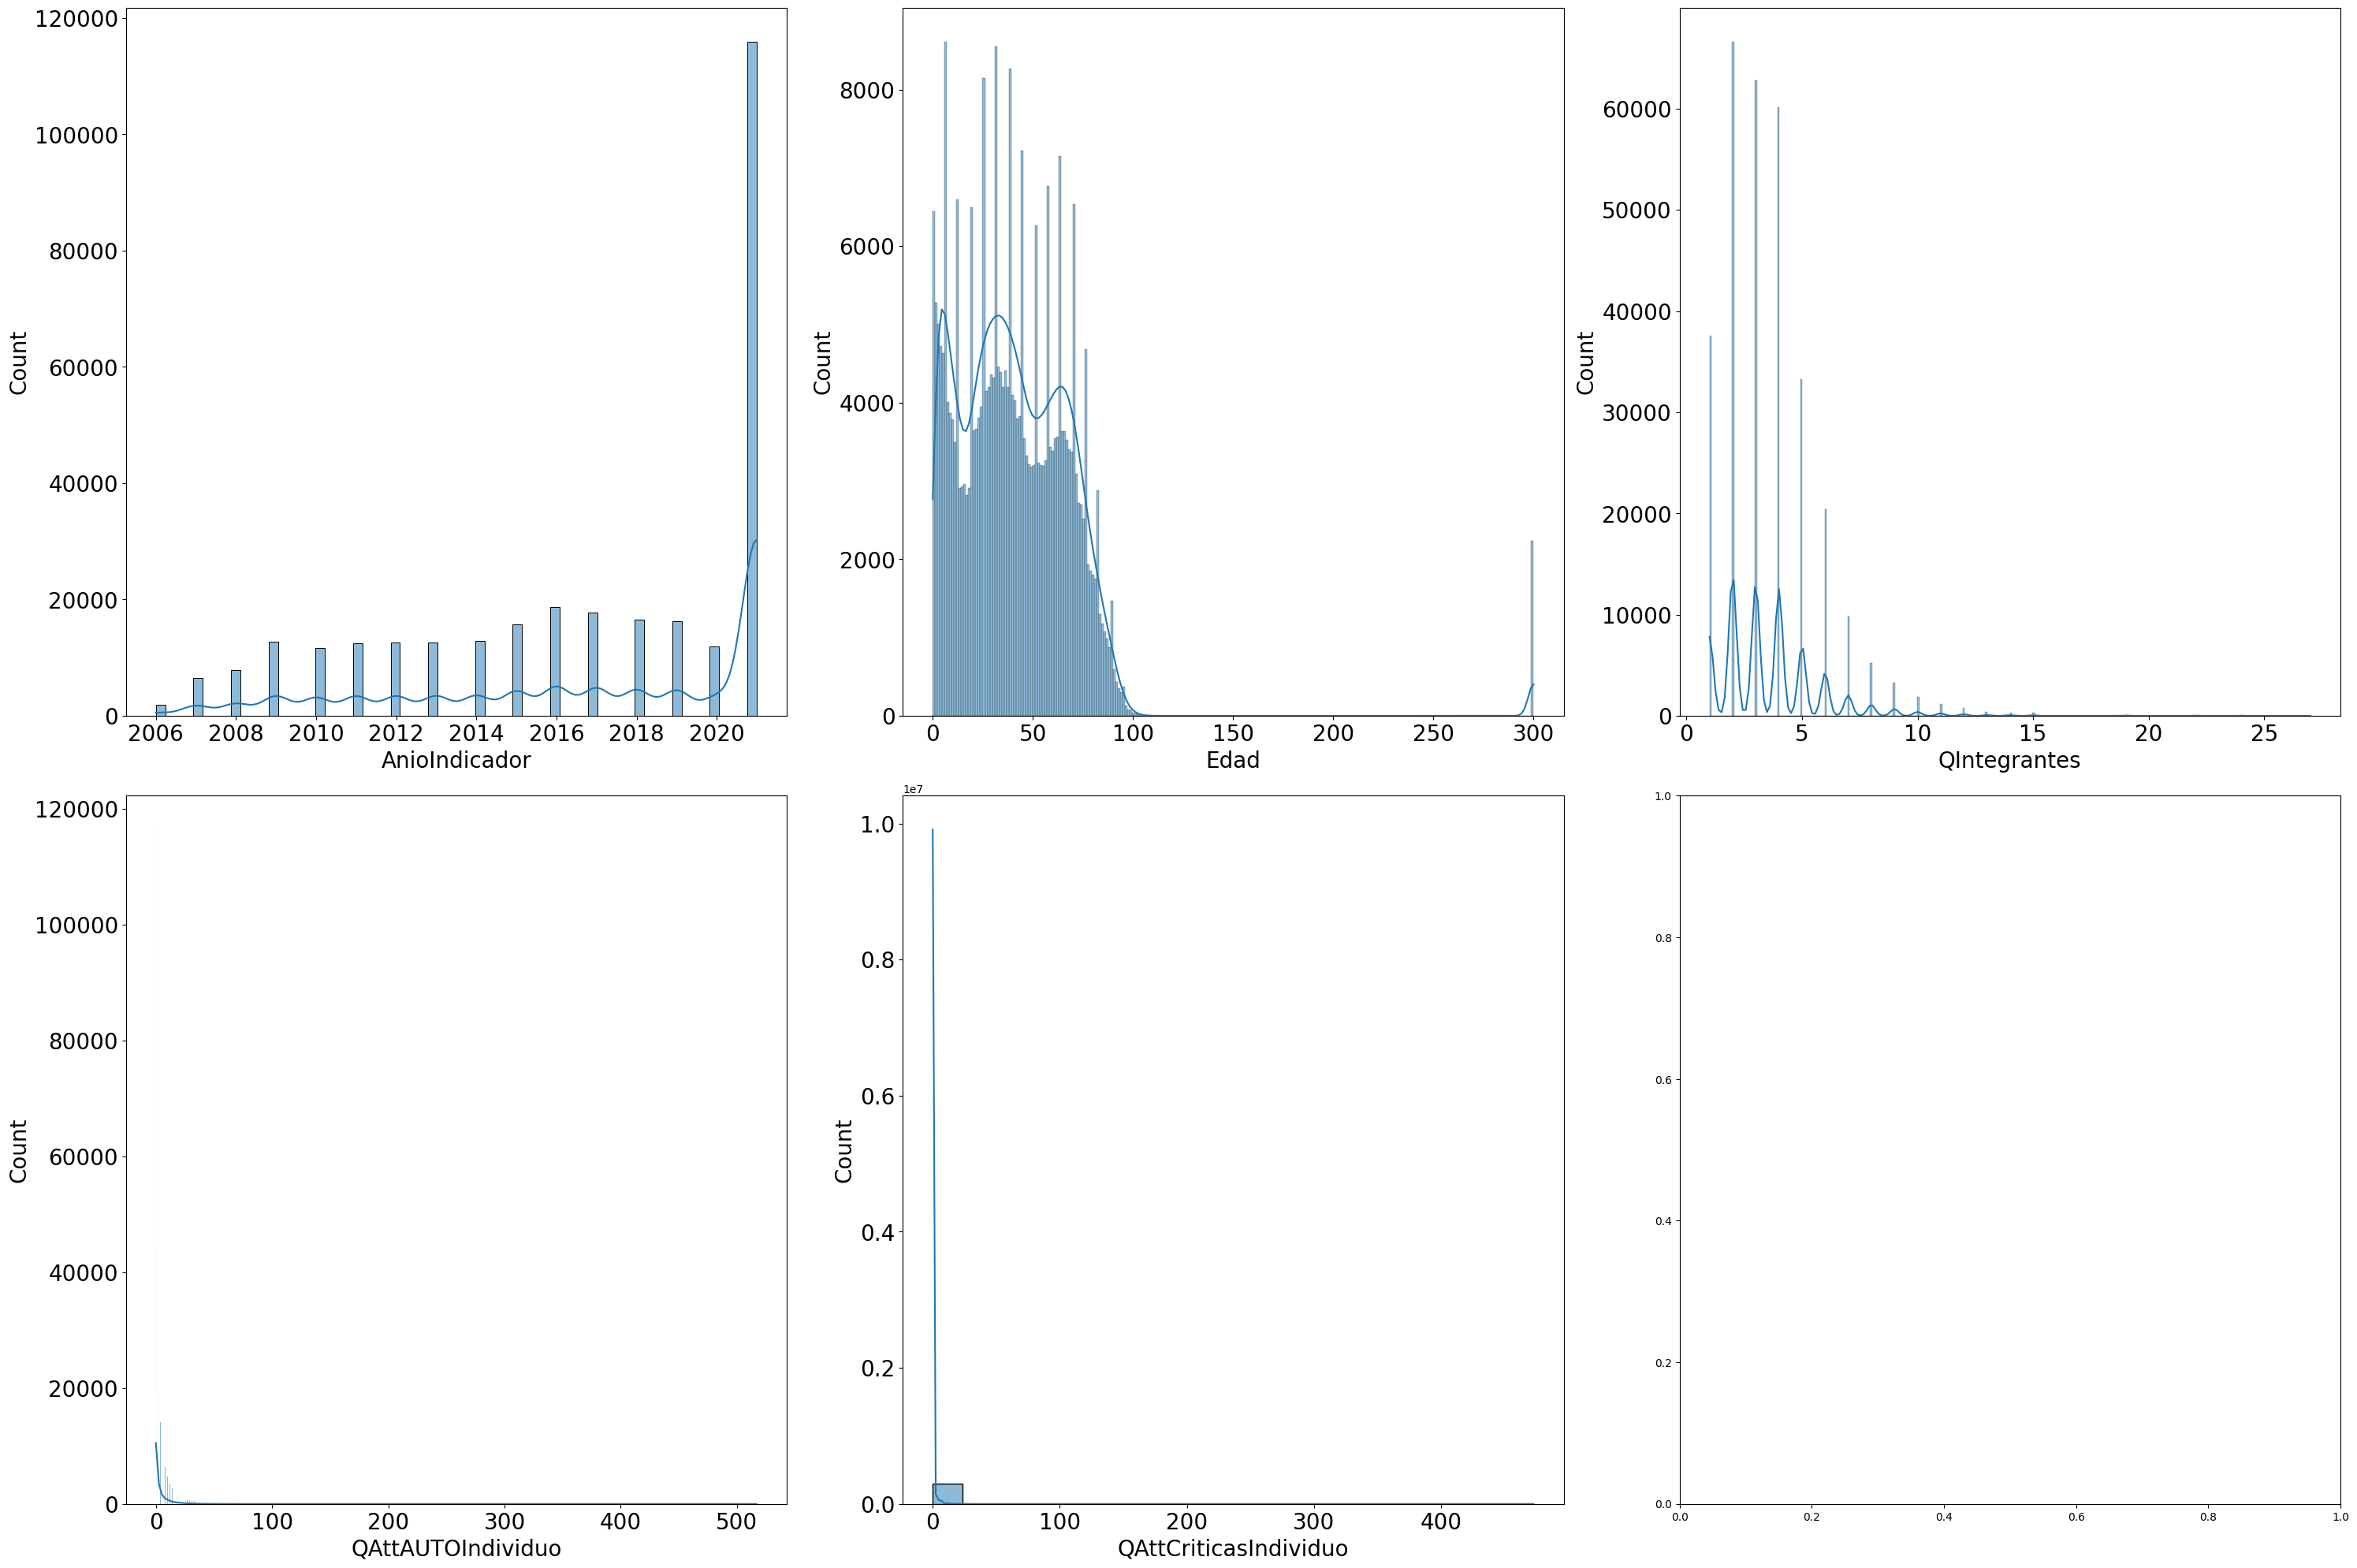

In [26]:
numeric_features_func(num_cols[0:5], df, 3)

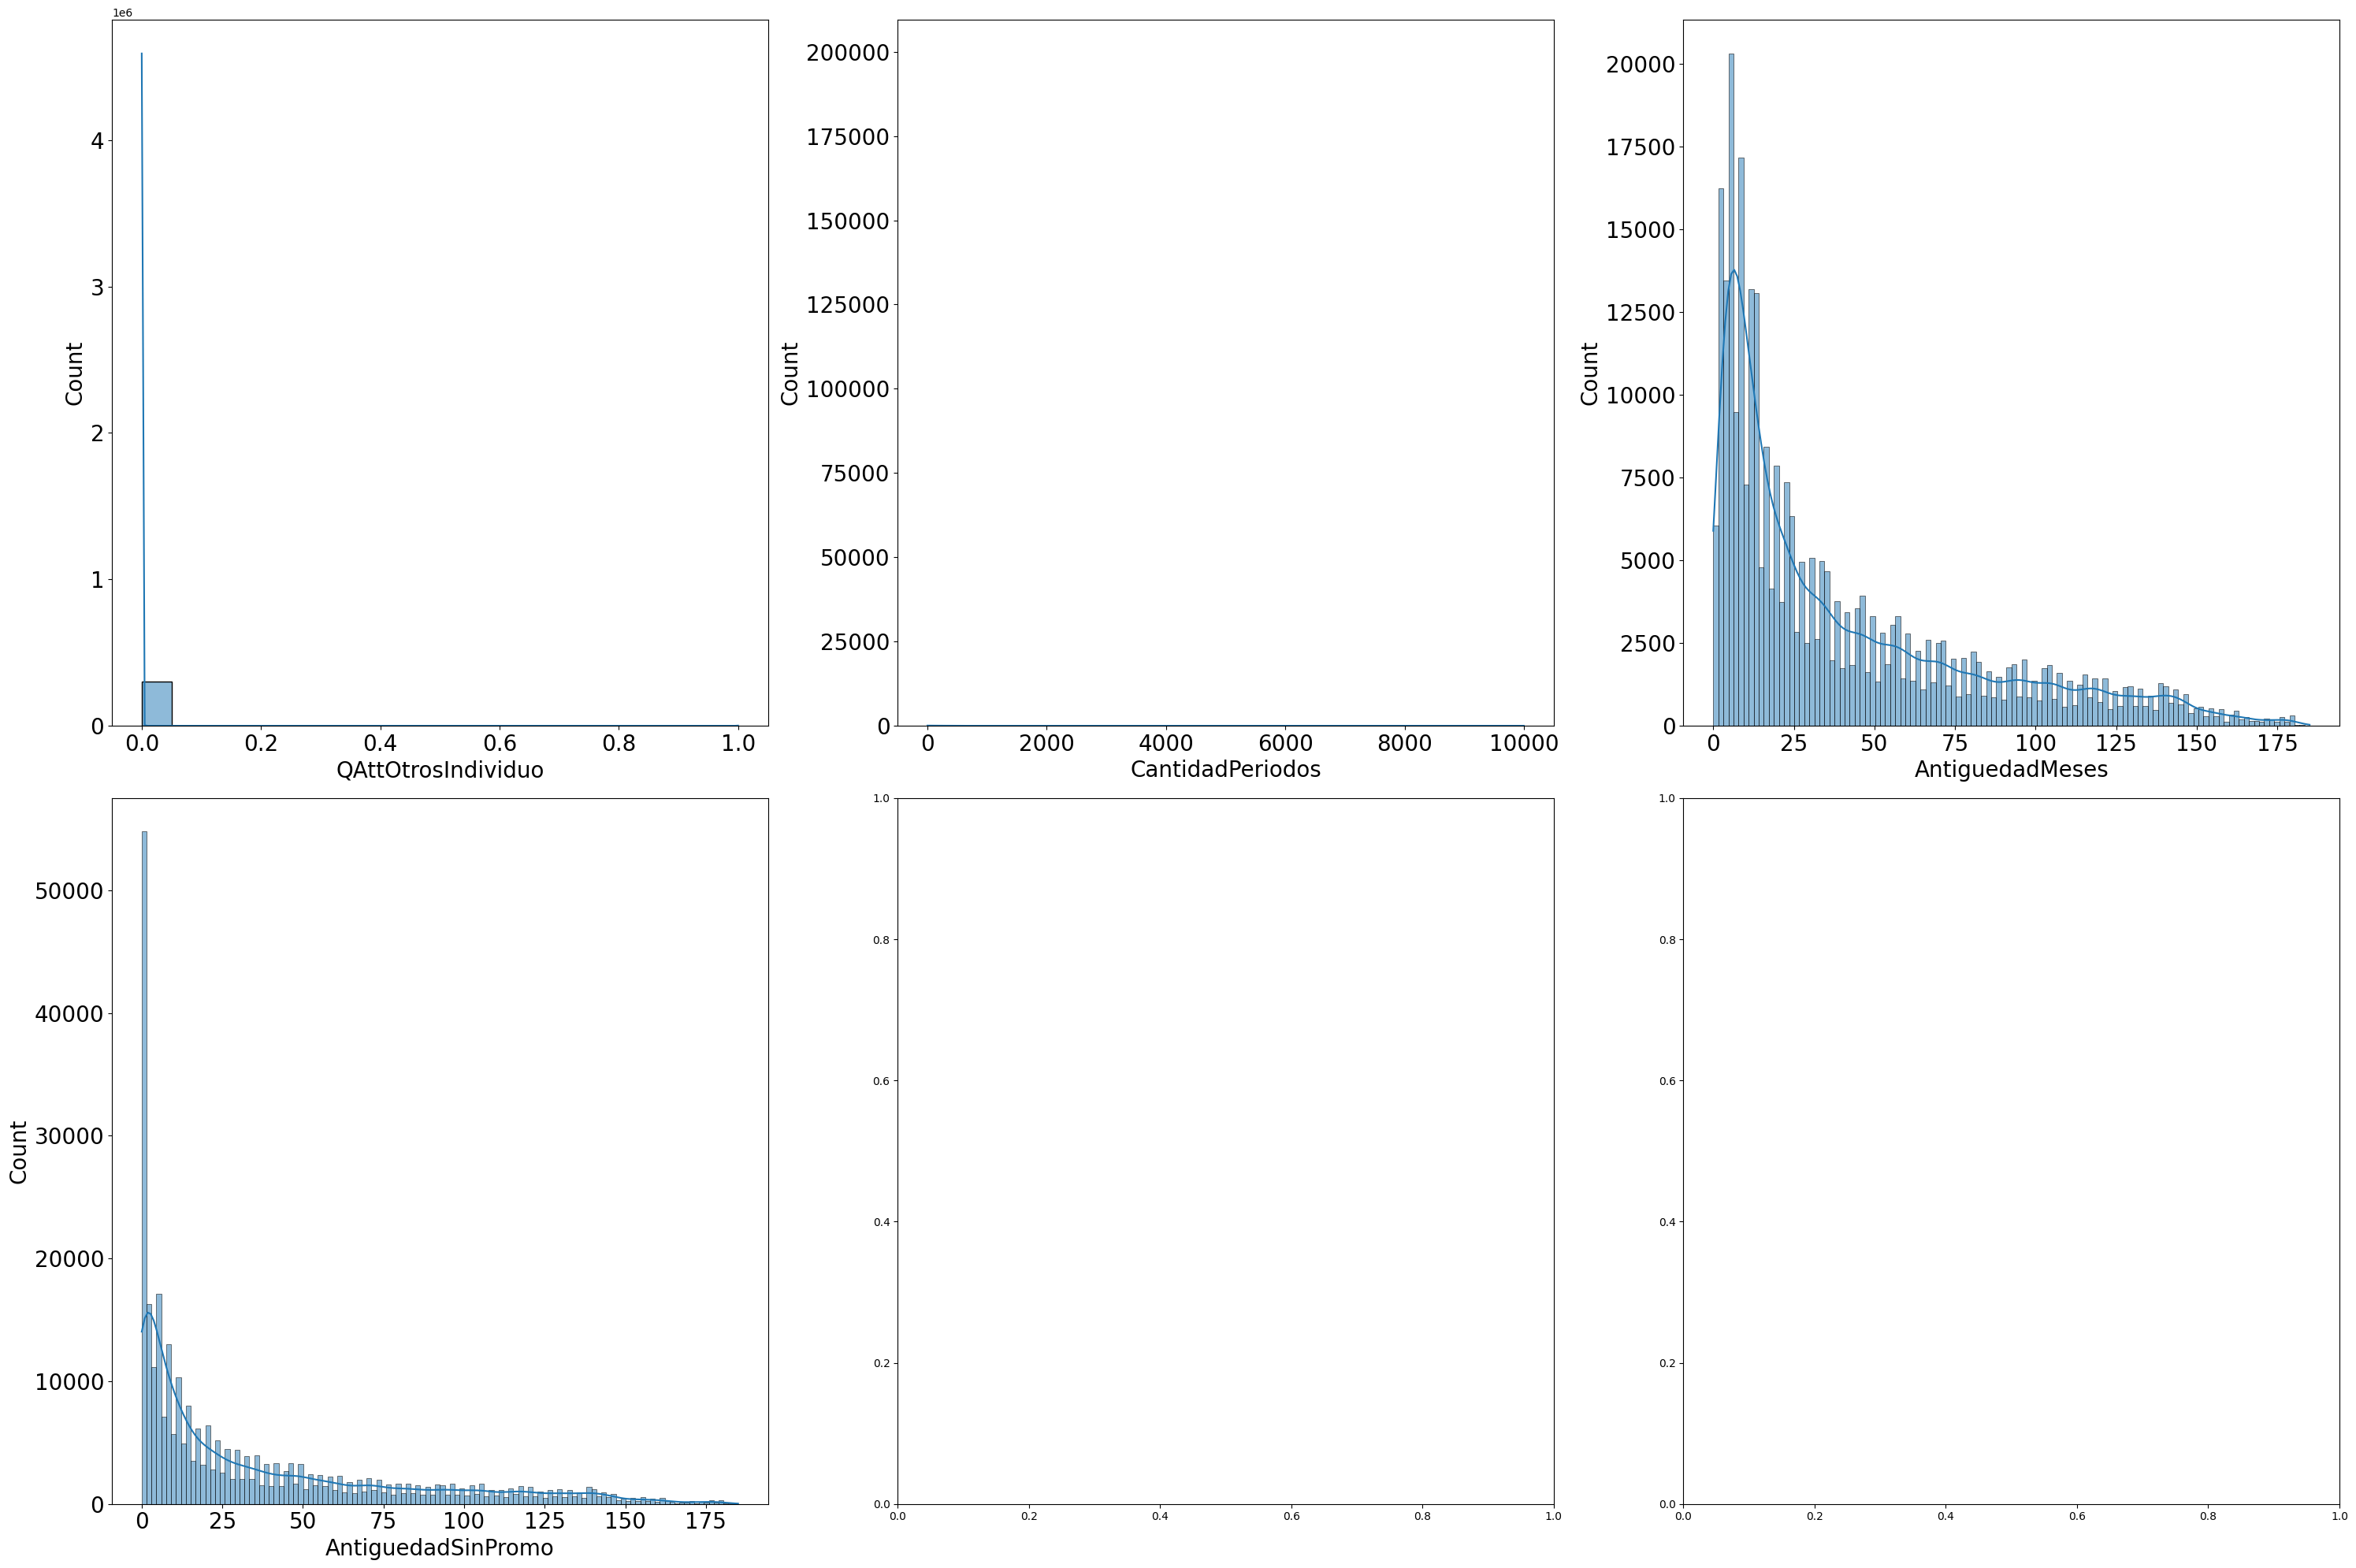

In [27]:
numeric_features_func(num_cols[5:], df, 3)

In [28]:
#Visualización bivariada de características numéricas
#relación entre cada variable numérica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def numeric_features_func(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    



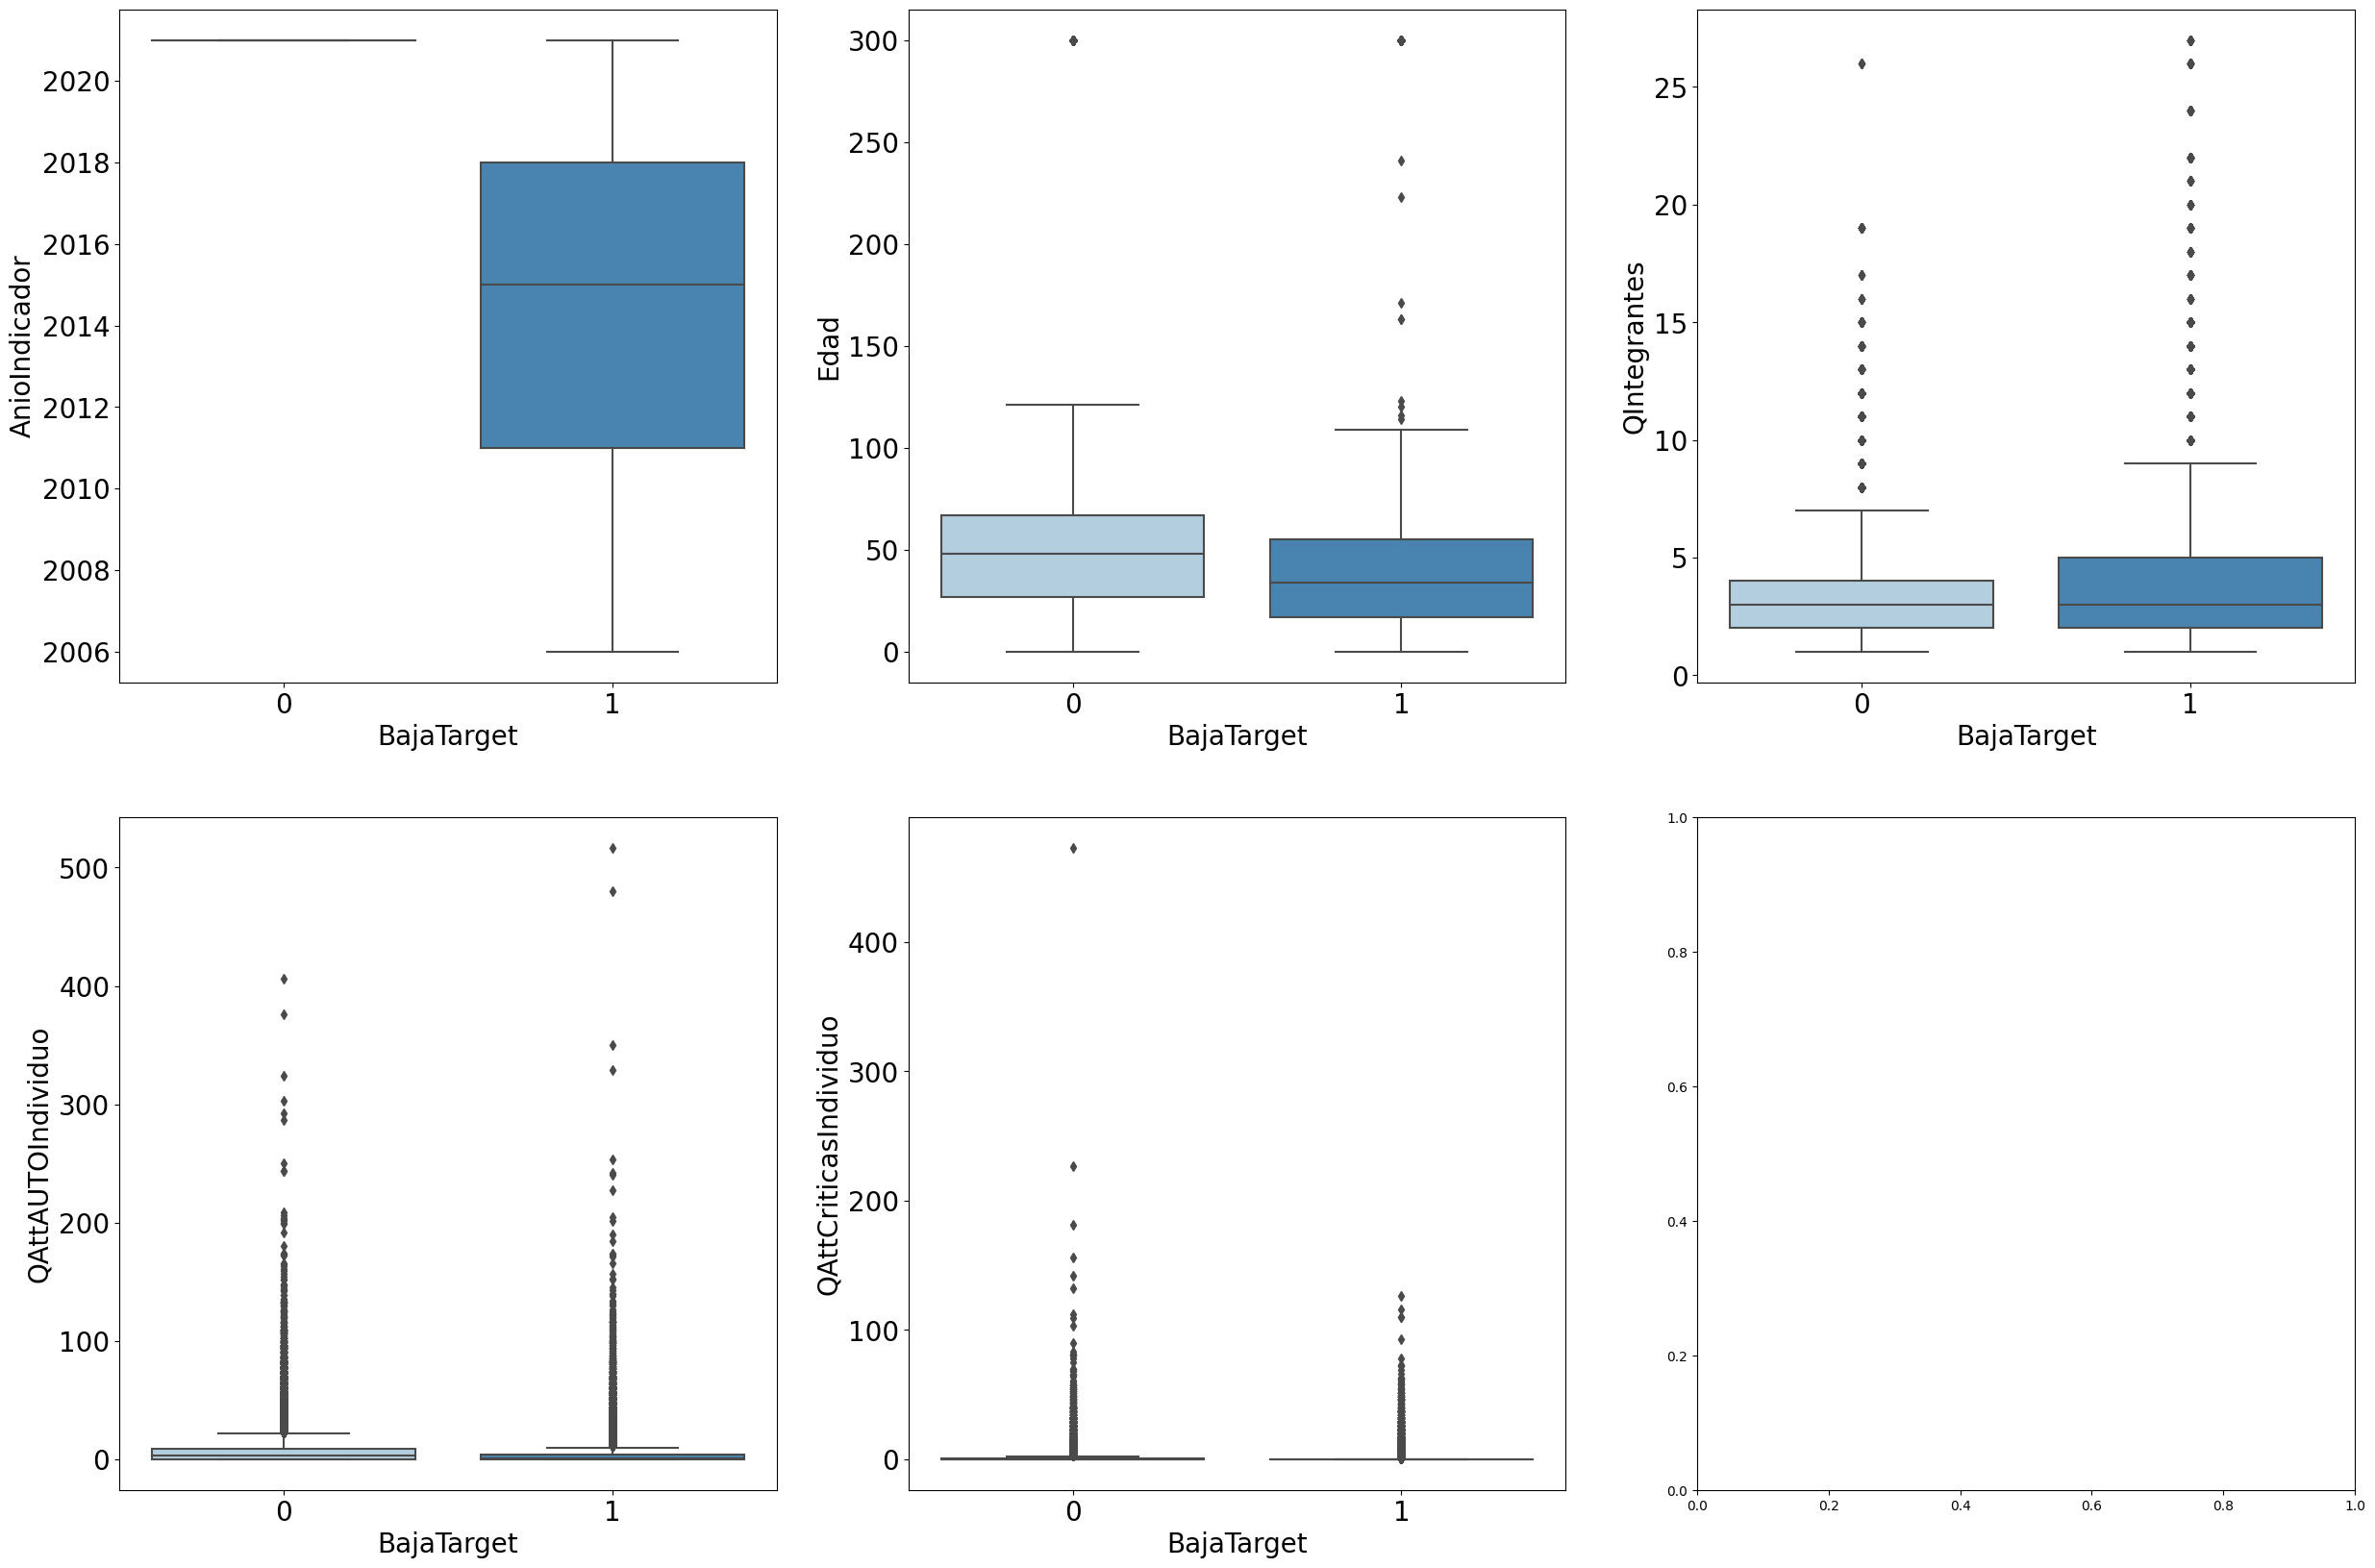

In [29]:
numeric_features_func(num_cols[0:5], 'BajaTarget' , df, 3)

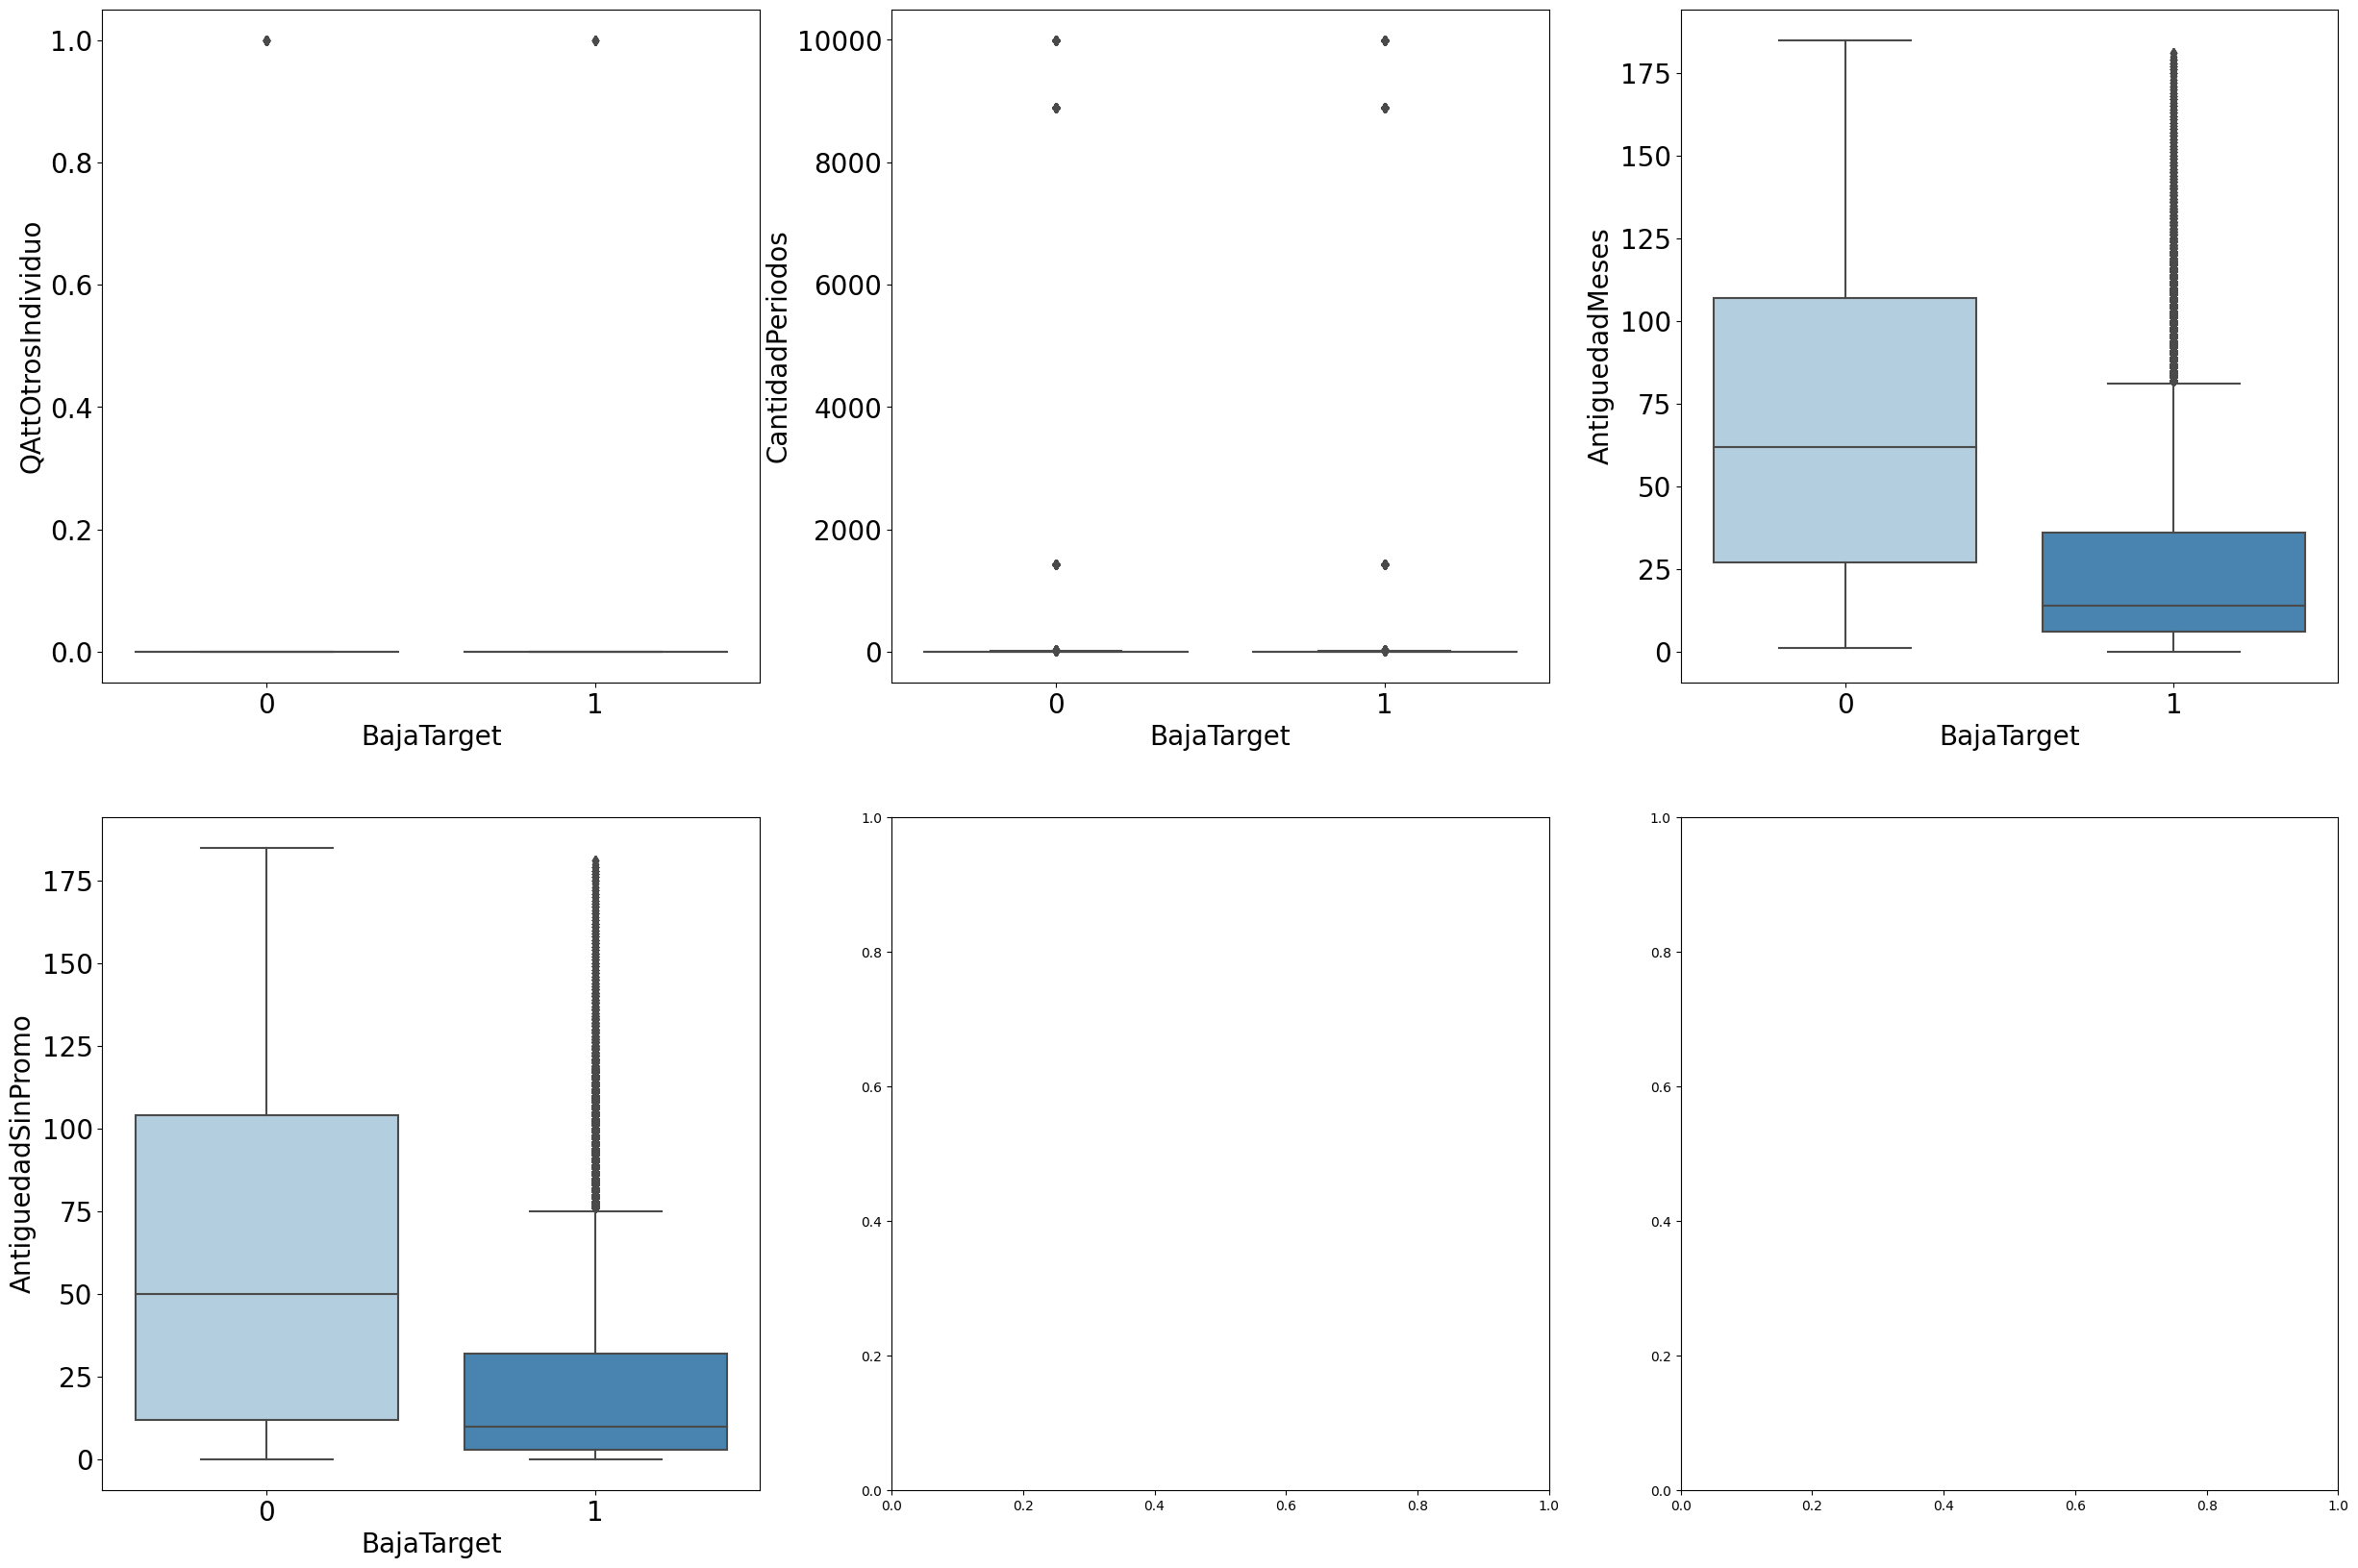

In [30]:
numeric_features_func(num_cols[5:], 'BajaTarget' , df, 3)